In [1]:
import random
import glob
from importlib import reload
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import torch
from torch_geometric.loader import DataLoader
import torch.nn.functional as F
import seaborn as sn
import time
import frame_loader as frame_loader
import utils as utils
import augmentation as augmentation
import graph_neural_network
from typing import  List

import numpy as np
import math
import pandas as pd
from pandas import DataFrame
from scipy.spatial import distance as distance_calculator
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import MinMaxScaler
import frame_loader as frame_loader
import gc

#### Hyperparameters

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
reduced_cols = ['doppler','snr','x','y','current_frame','Label']
column_names=['range','azimuth','doppler','snr','x','y','current_frame','seq', 'Label']
selected_cols = ['doppler','snr','x','y']
SHAPE_NAMES = [0,1,2,3,4, 5]
frame_depths = [10,10,10,10,10,10,10,10,10,10] 
ks = [2]
num_chunks = 16
lr = 0.001
max_epoch = 50
size = 64
split = 64
EARLY_STOPPING_PATIENCE = 10
# train, val, test =[],[],[]

#### Pre-processing pipeline

File read
Total number of frames: 23442
Number of graphs generated with k = 2 and frame depth = 10 for type 0: 6232
Number of graphs generated with k = 2 and frame depth = 10 for type 1: 1041
Number of graphs generated with k = 2 and frame depth = 10 for type 2: 1073


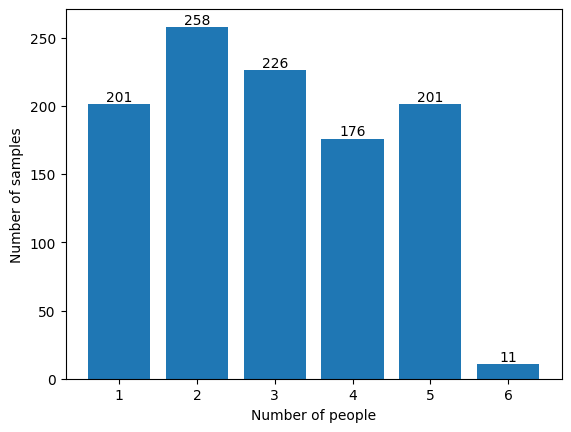

trained: 0


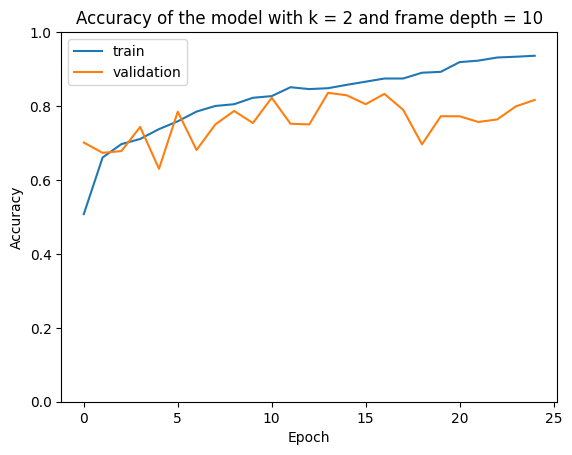

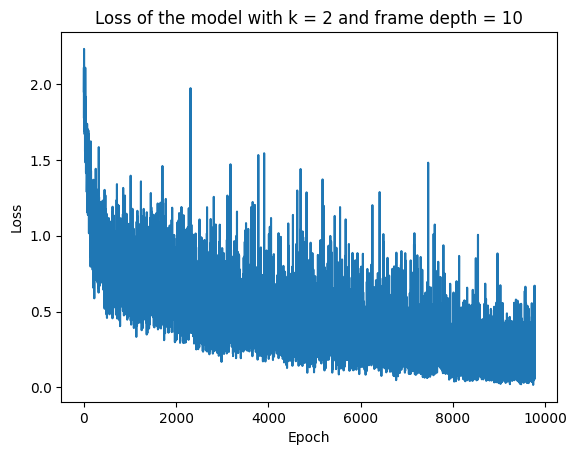

Training accuracy: 0.9360558408215661
Training loss: 0.058197737
Accuracy of the model with k = 2 and frame depth = 10: 0.8165
--- 564.0339050292969 seconds ---
evaluated: 0
Val accuracy of the model with k = 2 and frame depth = 10: 0.8357


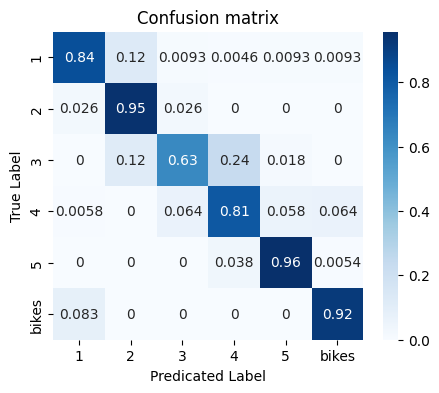

Test accuracy of the model with k = 2 and frame depth = 10: 0.7894


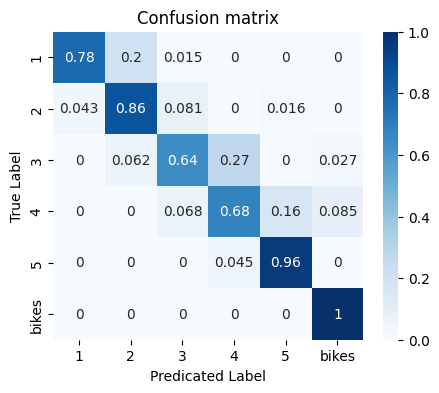

Number of graphs generated with k = 2 and frame depth = 10 for type 0: 6232
Number of graphs generated with k = 2 and frame depth = 10 for type 1: 1041
Number of graphs generated with k = 2 and frame depth = 10 for type 2: 1073


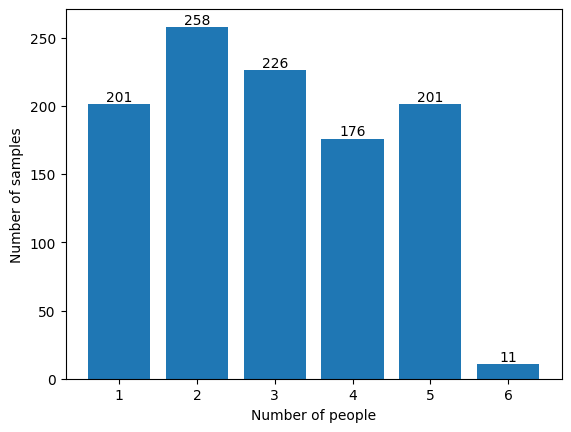

trained: 0


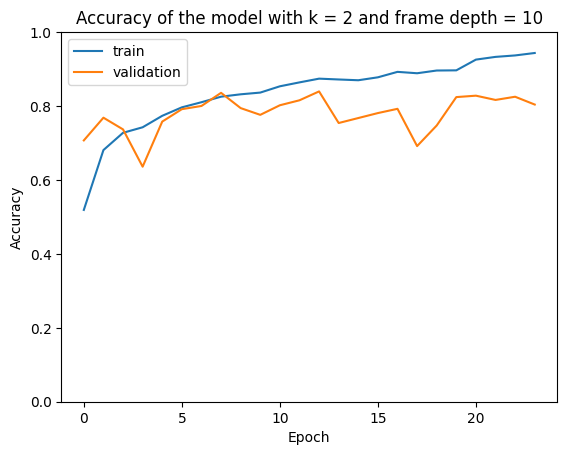

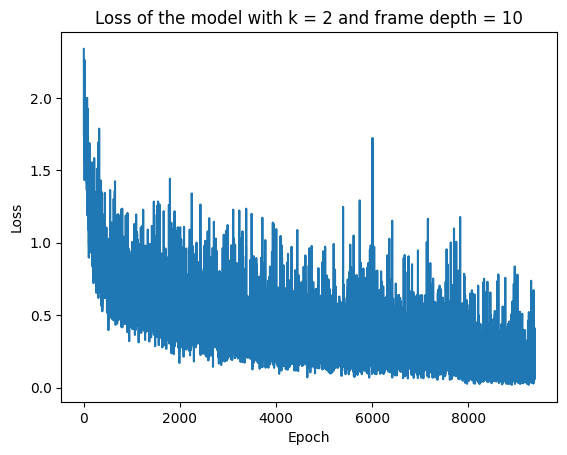

Training accuracy: 0.9435173299101413
Training loss: 0.35469416
Accuracy of the model with k = 2 and frame depth = 10: 0.8040
--- 538.1116442680359 seconds ---
evaluated: 0
Val accuracy of the model with k = 2 and frame depth = 10: 0.8396


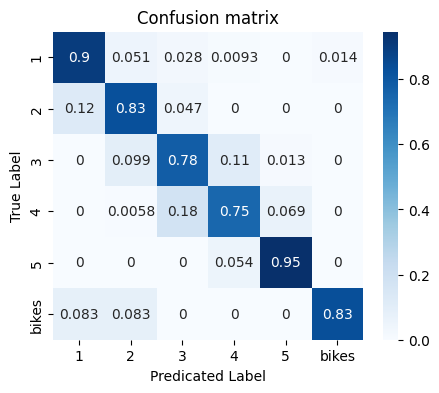

Test accuracy of the model with k = 2 and frame depth = 10: 0.8490


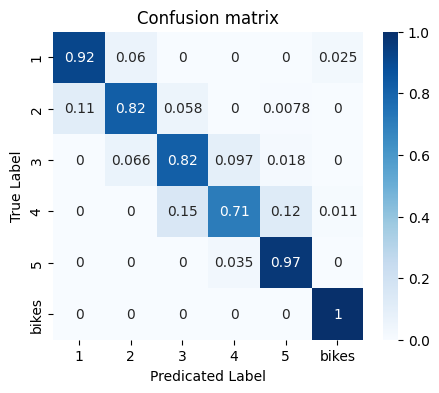

Number of graphs generated with k = 2 and frame depth = 10 for type 0: 6232
Number of graphs generated with k = 2 and frame depth = 10 for type 1: 1041
Number of graphs generated with k = 2 and frame depth = 10 for type 2: 1073


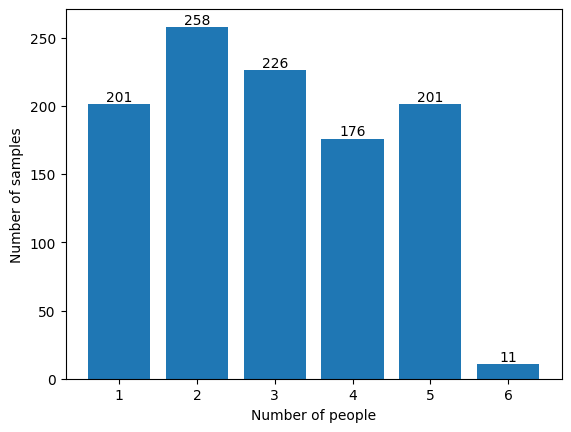

trained: 0


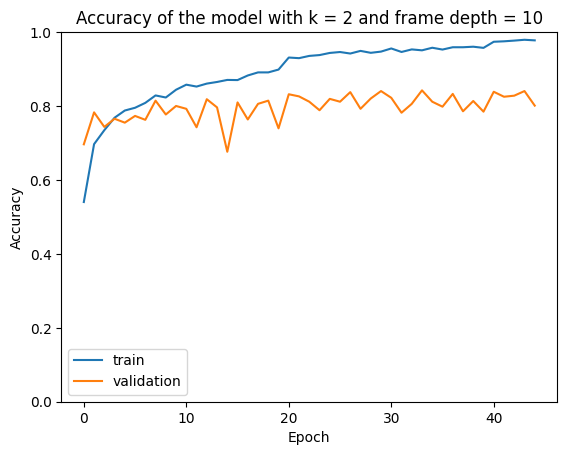

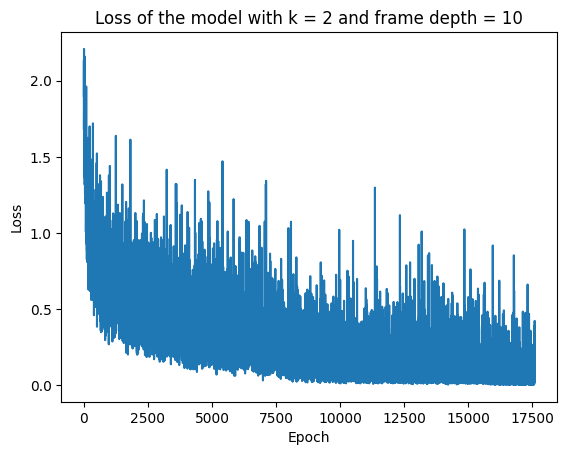

Training accuracy: 0.9776957637997432
Training loss: 0.034499265
Accuracy of the model with k = 2 and frame depth = 10: 0.8012
--- 1012.6163351535797 seconds ---
evaluated: 0
Val accuracy of the model with k = 2 and frame depth = 10: 0.8425


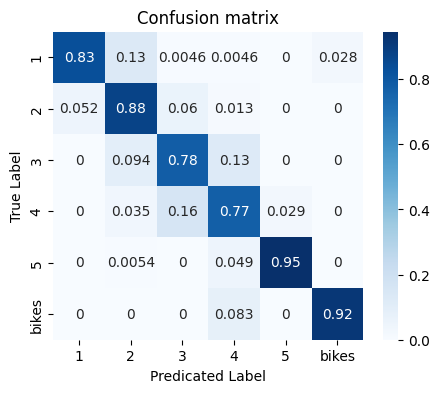

Test accuracy of the model with k = 2 and frame depth = 10: 0.7987


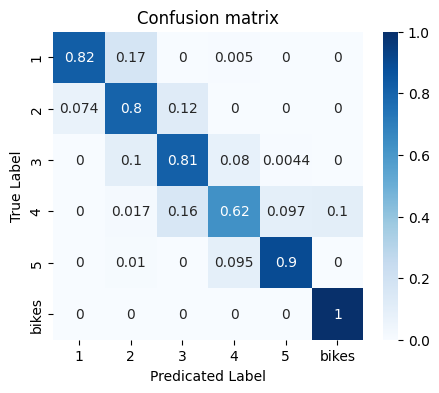

Number of graphs generated with k = 2 and frame depth = 10 for type 0: 6232
Number of graphs generated with k = 2 and frame depth = 10 for type 1: 1041
Number of graphs generated with k = 2 and frame depth = 10 for type 2: 1073


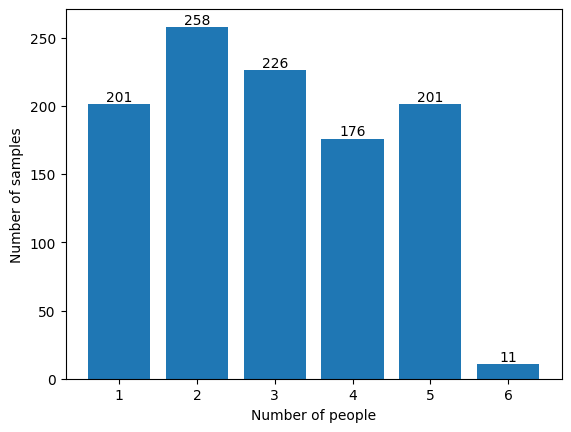

trained: 0


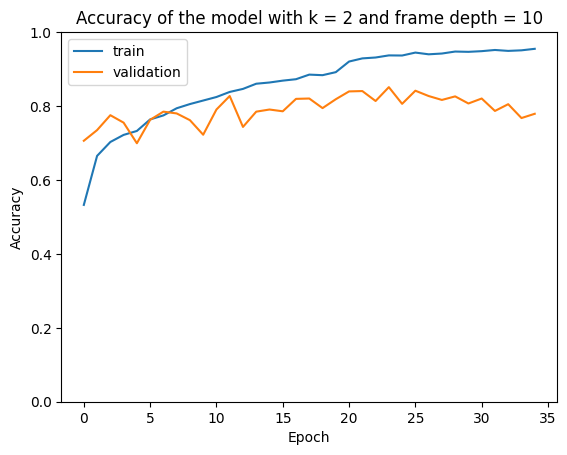

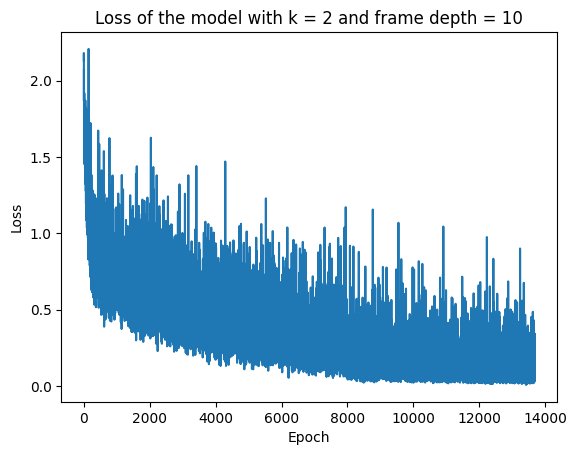

Training accuracy: 0.9548299101412067
Training loss: 0.032822266
Accuracy of the model with k = 2 and frame depth = 10: 0.7791
--- 785.0014452934265 seconds ---
evaluated: 0
Val accuracy of the model with k = 2 and frame depth = 10: 0.8511


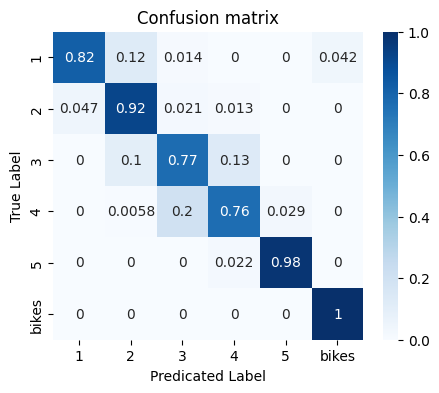

Test accuracy of the model with k = 2 and frame depth = 10: 0.8089


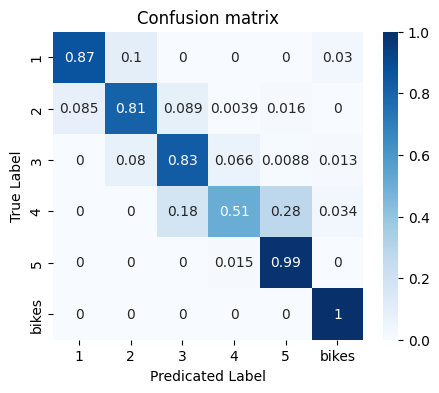

Number of graphs generated with k = 2 and frame depth = 10 for type 0: 6232
Number of graphs generated with k = 2 and frame depth = 10 for type 1: 1041
Number of graphs generated with k = 2 and frame depth = 10 for type 2: 1073


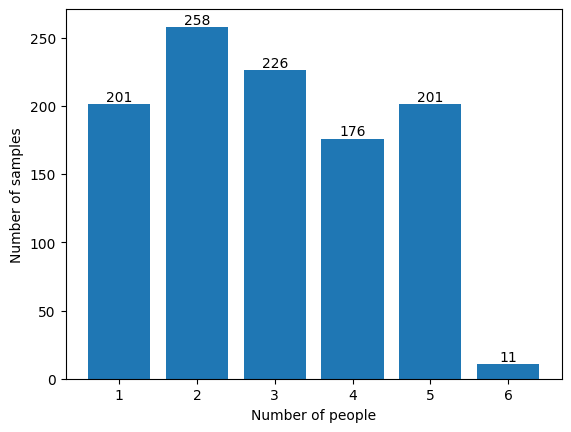

trained: 0


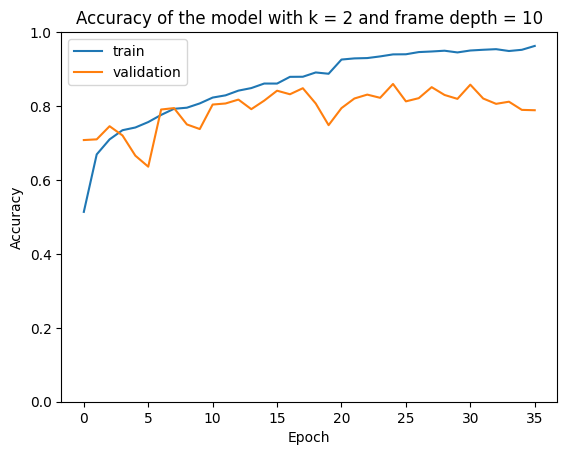

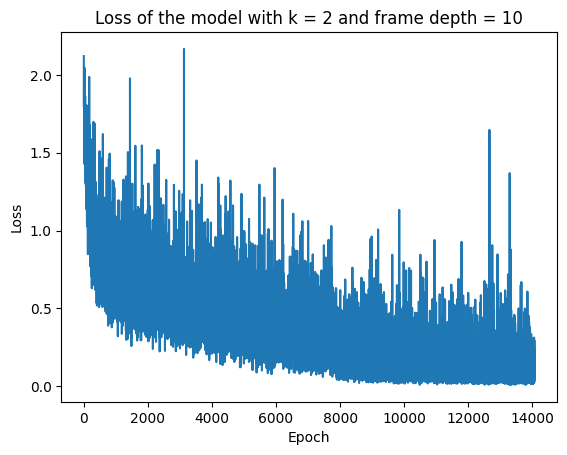

Training accuracy: 0.9626123234916559
Training loss: 0.12765794
Accuracy of the model with k = 2 and frame depth = 10: 0.7887
--- 810.6657886505127 seconds ---
evaluated: 0
Val accuracy of the model with k = 2 and frame depth = 10: 0.8598


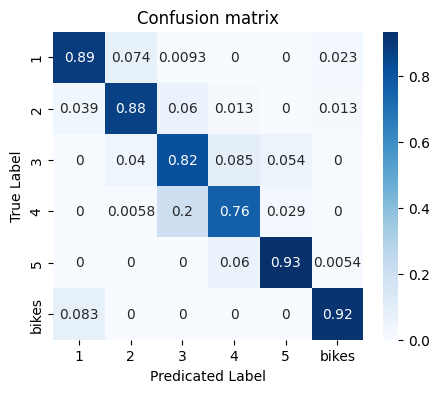

Test accuracy of the model with k = 2 and frame depth = 10: 0.8267


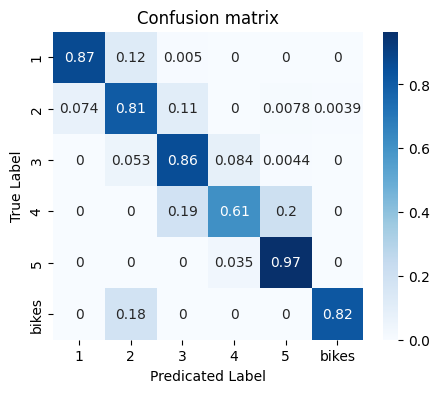

Number of graphs generated with k = 2 and frame depth = 10 for type 0: 6232
Number of graphs generated with k = 2 and frame depth = 10 for type 1: 1041
Number of graphs generated with k = 2 and frame depth = 10 for type 2: 1073


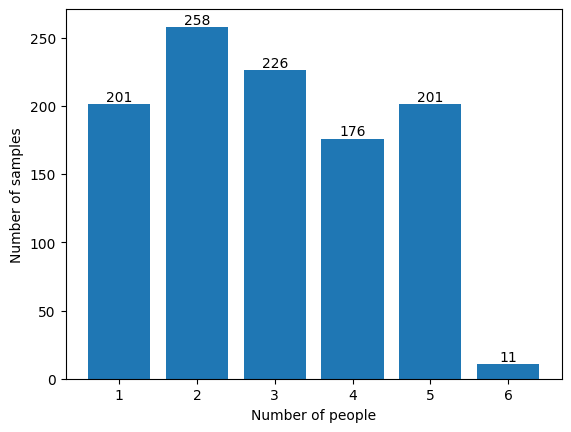

trained: 0


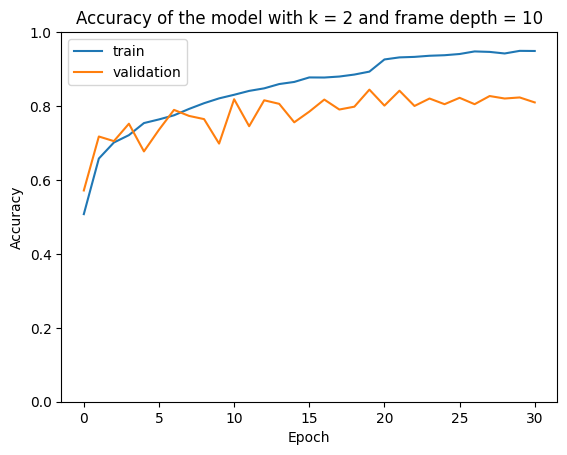

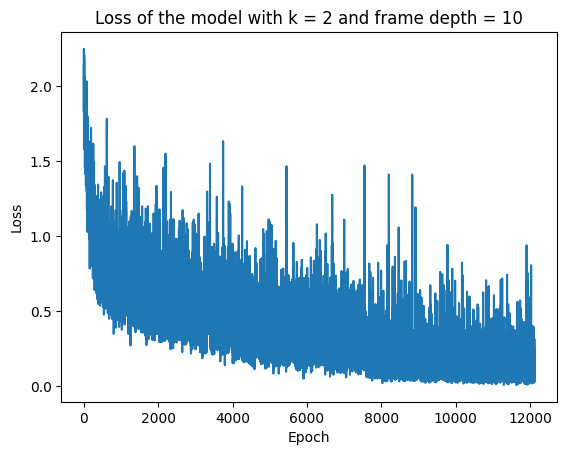

Training accuracy: 0.9489730423620025
Training loss: 0.09129302
Accuracy of the model with k = 2 and frame depth = 10: 0.8098
--- 695.6351065635681 seconds ---
evaluated: 0
Val accuracy of the model with k = 2 and frame depth = 10: 0.8444


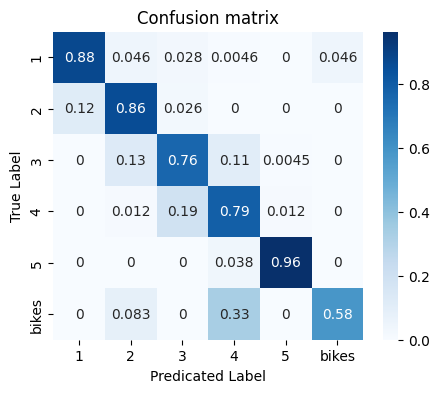

Test accuracy of the model with k = 2 and frame depth = 10: 0.7996


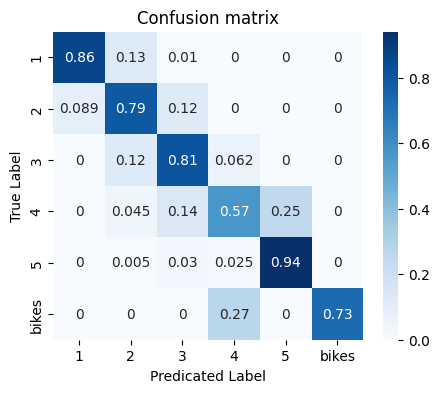

Number of graphs generated with k = 2 and frame depth = 10 for type 0: 6232
Number of graphs generated with k = 2 and frame depth = 10 for type 1: 1041
Number of graphs generated with k = 2 and frame depth = 10 for type 2: 1073


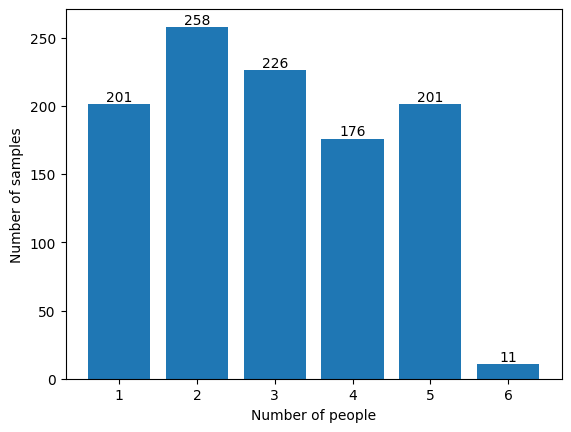

trained: 0


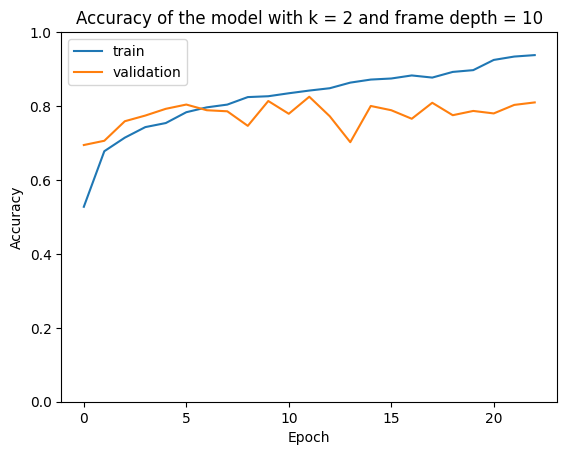

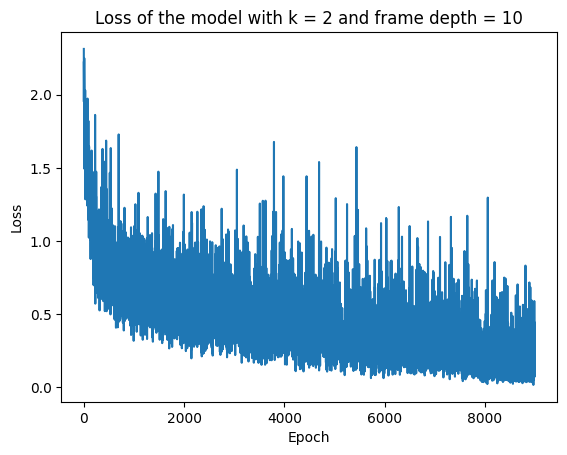

Training accuracy: 0.9378209242618742
Training loss: 0.22223824
Accuracy of the model with k = 2 and frame depth = 10: 0.8098
--- 517.8704450130463 seconds ---
evaluated: 0
Val accuracy of the model with k = 2 and frame depth = 10: 0.8252


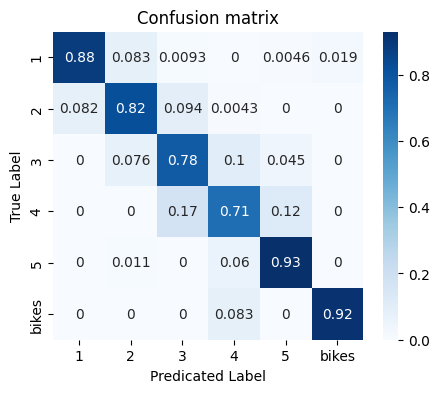

Test accuracy of the model with k = 2 and frame depth = 10: 0.8006


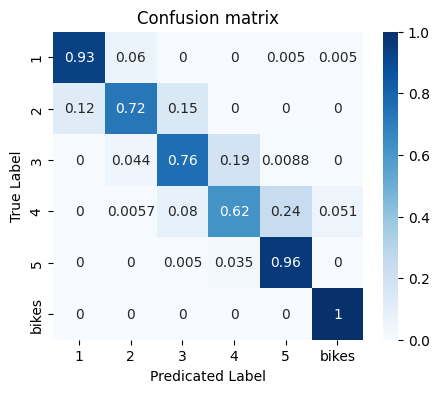

Number of graphs generated with k = 2 and frame depth = 10 for type 0: 6232
Number of graphs generated with k = 2 and frame depth = 10 for type 1: 1041
Number of graphs generated with k = 2 and frame depth = 10 for type 2: 1073


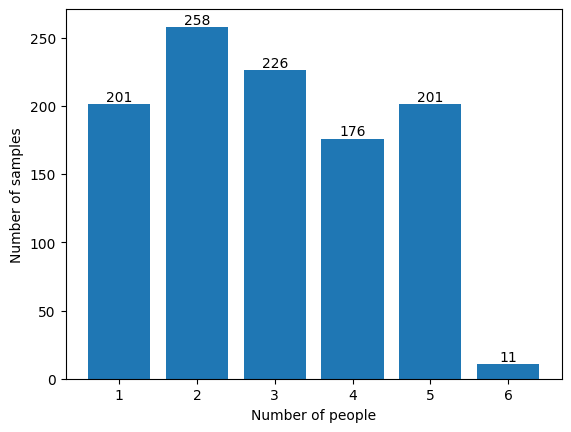

trained: 0


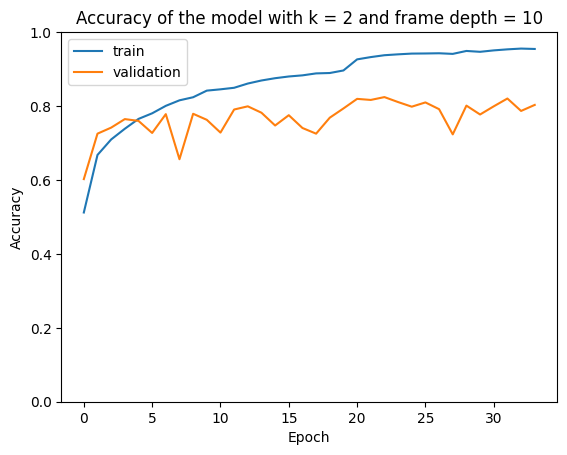

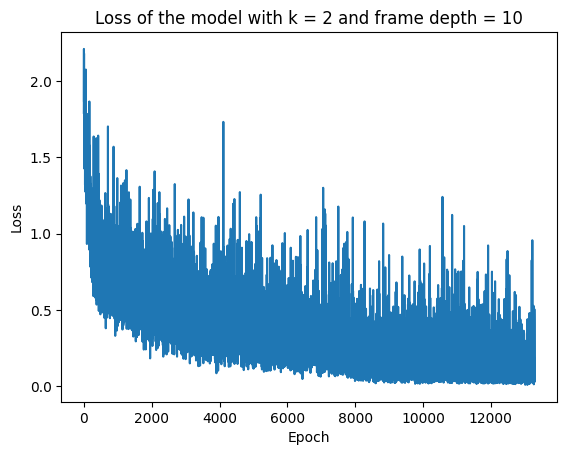

Training accuracy: 0.9544287548138639
Training loss: 0.043521147
Accuracy of the model with k = 2 and frame depth = 10: 0.8031
--- 762.8083987236023 seconds ---
evaluated: 0
Val accuracy of the model with k = 2 and frame depth = 10: 0.8242


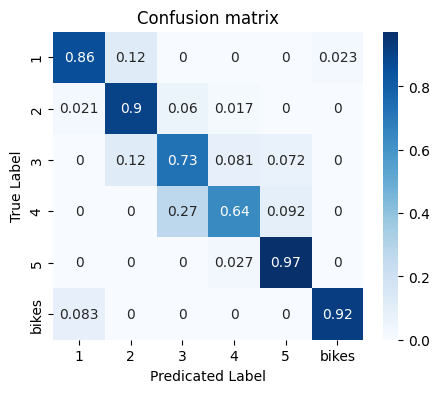

Test accuracy of the model with k = 2 and frame depth = 10: 0.7884


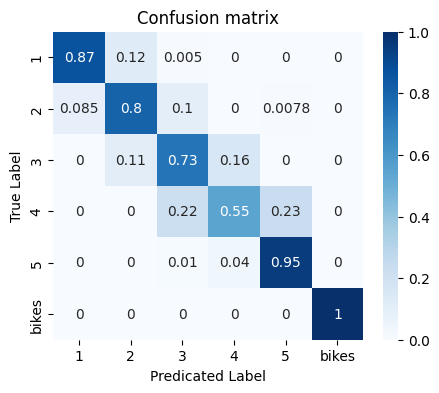

Number of graphs generated with k = 2 and frame depth = 10 for type 0: 6232
Number of graphs generated with k = 2 and frame depth = 10 for type 1: 1041
Number of graphs generated with k = 2 and frame depth = 10 for type 2: 1073


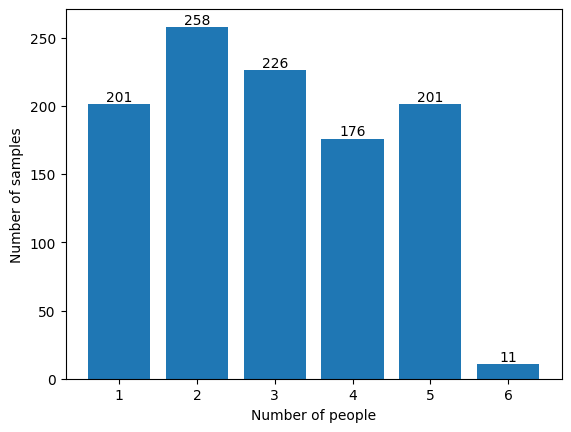

trained: 0


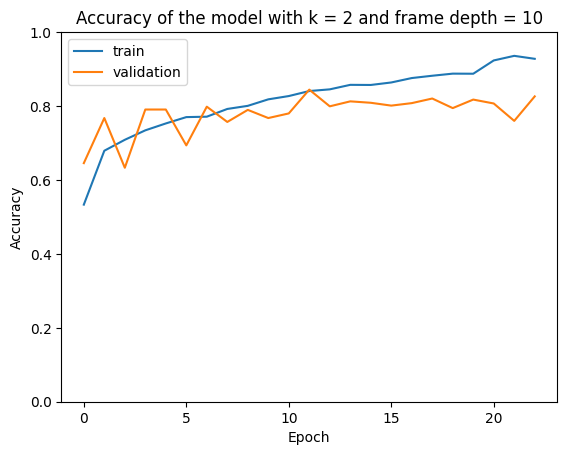

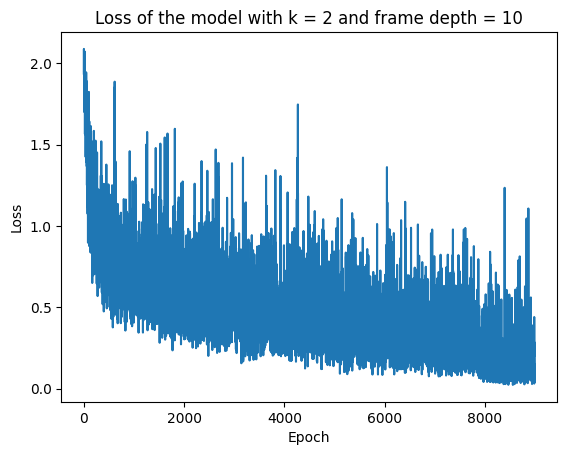

Training accuracy: 0.9277920410783055
Training loss: 0.0728134
Accuracy of the model with k = 2 and frame depth = 10: 0.8261
--- 517.9328730106354 seconds ---
evaluated: 0
Val accuracy of the model with k = 2 and frame depth = 10: 0.8444


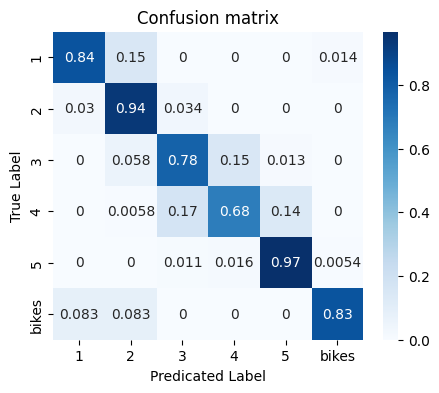

Test accuracy of the model with k = 2 and frame depth = 10: 0.7940


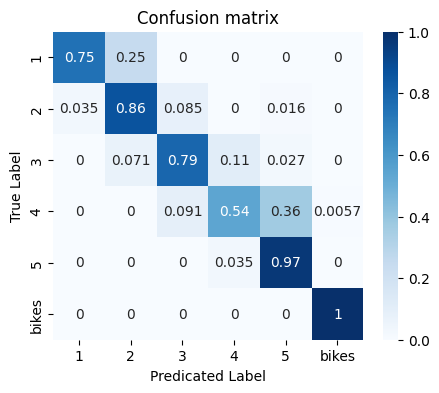

Number of graphs generated with k = 2 and frame depth = 10 for type 0: 6232
Number of graphs generated with k = 2 and frame depth = 10 for type 1: 1041
Number of graphs generated with k = 2 and frame depth = 10 for type 2: 1073


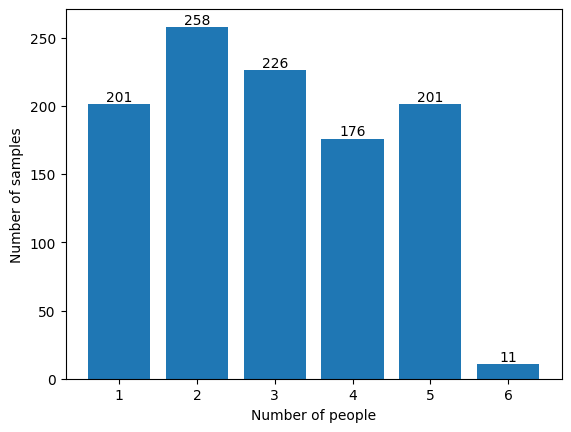

trained: 0


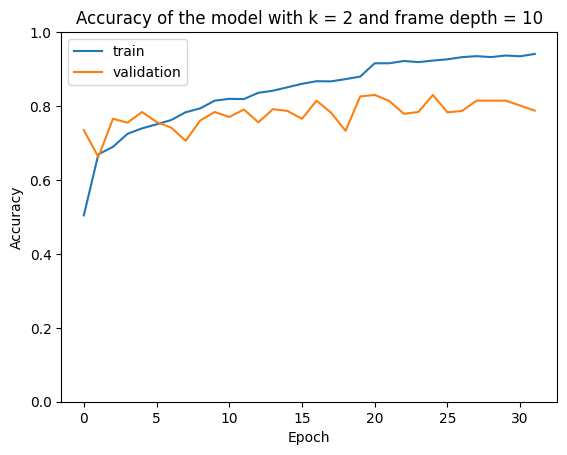

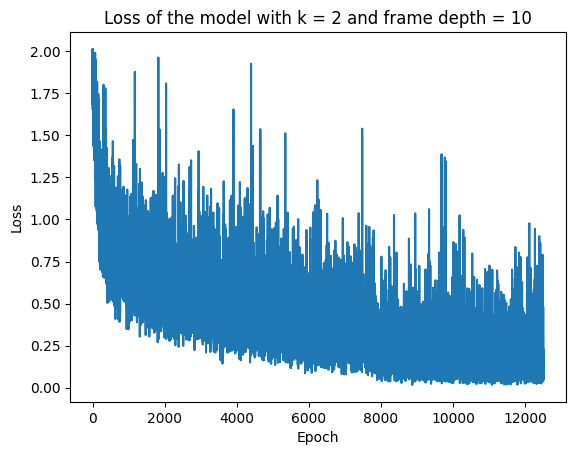

Training accuracy: 0.9409499358151476
Training loss: 0.4746399
Accuracy of the model with k = 2 and frame depth = 10: 0.7877
--- 717.8202135562897 seconds ---
evaluated: 0
Val accuracy of the model with k = 2 and frame depth = 10: 0.8300


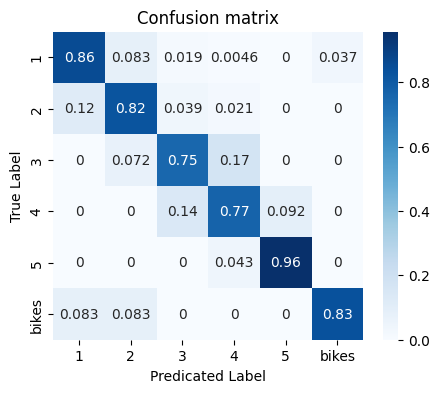

Test accuracy of the model with k = 2 and frame depth = 10: 0.7912


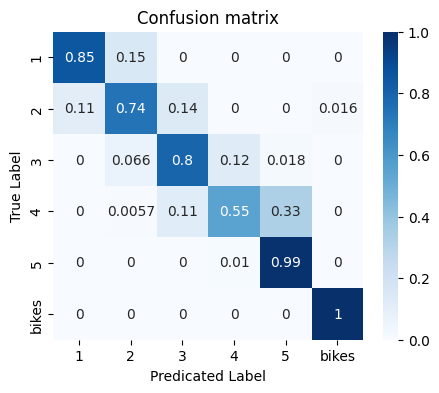

In [3]:
reload(utils)
try:
    point_frames = pd.read_csv("data/all_data.csv", names=column_names, header=None, dtype=np.float64)
    print("File read")
except Exception as e:
    point_frames = frame_loader.load_original_frames()
    print("Frames generated")

all_data_grouped = point_frames[reduced_cols].groupby("current_frame")
print("Total number of frames: "+str(len(all_data_grouped)))
data_array = [frame.to_numpy() for (_, frame) in all_data_grouped]

# Sort the data
sorted_data = sorted(data_array,key=lambda x:x[:,4].max(axis=0))

# Split the data
train, val, test = utils.split_with_chunks_list(sorted_data, SHAPE_NAMES, num_chunks, 0.15, 0.15)

aggr_true_y_label_val = []
aggr_pred_y_label_val = []
aggr_true_y_label_test = []
aggr_pred_y_label_test = []

for k in ks:
    for iter, fd in enumerate(frame_depths):
        results = np.empty(4)

        train_graphs, val_graphs, test_graphs = utils.load_graphs(train, val, test, [fd], [k], selected_cols, \
                                                          num_chunks, size, split, device, mode="random")
        
        data_points = np.array([d.y.item() for d in test_graphs[0]])
        zeros = len(np.where(data_points  == 0)[0])
        ones = len(np.where(data_points  == 1)[0])
        twos = len(np.where(data_points  == 2)[0])
        threes = len(np.where(data_points  == 3)[0]) 
        fours = len(np.where(data_points  == 4)[0])
        bikes = len(np.where(data_points  == 5)[0])

        labels = [1,2,3,4,5, 6]
        sample_num = [zeros, ones, twos, threes, fours,bikes]
        p = plt.bar(labels, sample_num)
        plt.xlabel("Number of people")
        plt.ylabel("Number of samples")
        plt.bar_label(p)
        plt.show()
        
        results[0] = len(train_graphs[0])
        
        augmentation_transformer = augmentation.AugmentationTransformerList(size)
        augmented_graphs = augmentation_transformer(train_graphs[0])
        train_graphs[0].extend(augmented_graphs)

        train_dataloaders = []
        test_dataloaders = []
        val_dataloaders = []

        # Batch the sets
        for i in range(len(train_graphs)):
            random.seed(42)
            random.shuffle(train_graphs[i])
            random.seed(42)
            random.shuffle(test_graphs[i])
            random.seed(42)
            random.shuffle(val_graphs[i])
            
            train_dataloaders.append(DataLoader(train_graphs[i], batch_size=32, shuffle=True, num_workers = 0))
            test_dataloaders.append(DataLoader(test_graphs[i], batch_size=32, shuffle=True, num_workers = 0))
            val_dataloaders.append(DataLoader(val_graphs[i], batch_size=32, shuffle=True, num_workers = 0))
        

        for i, train_dataloader in enumerate(train_dataloaders):
            val_accuracies = []
            start_time = time.time()
            # k = ks[i % len(ks)]
            model = graph_neural_network.Net(6, k=k).to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
            scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

            best_acc = -1
            losses = []
            accuracies = []
            for epoch in range(max_epoch):
                correct = 0
                count = 0
                model.train()
                for train_batch in train_dataloader:
                    train_batch = train_batch.to(device)
                    optimizer.zero_grad()
                    out = model(train_batch)
                    pred = out.argmax(dim=1)
                    correct += (pred == train_batch.y).sum()
                    loss = F.nll_loss(out, train_batch.y)
                    losses.append(loss.detach())
                    loss.backward()
                    optimizer.step()
                    count += len(train_batch)
                acc = int(correct) / count
                losses.append(loss.detach())
                accuracies.append(acc)
                scheduler.step()

                model.eval()
                val_correct = 0
                for val_batch in val_dataloaders[i]:
                    val_batch = val_batch.to(device)
                    pred = model(val_batch).argmax(dim=1)
                    
                    val_correct += (pred == val_batch.y).sum()
                val_acc = int(val_correct) / len(val_dataloaders[i].dataset)
                val_accuracies.append(val_acc)

                if val_acc > best_acc:
                    best_acc = val_acc
                    best_model = model
                    torch.save(model, f"data/trained_model_k{k}_frame_depth{fd}_random_iter{iter}_bikes.pt")
                    last_improvement = 0
                else:
                    last_improvement += 1

                if last_improvement > EARLY_STOPPING_PATIENCE:
                    break
            
            losses = [tensor.cpu().numpy() for tensor in losses]
            print(f"trained: {i}")

            plt.plot(accuracies, label = "train")
            plt.plot(val_accuracies, label = "validation")
            plt.title(f"Accuracy of the model with k = {k} and frame depth = {fd}")
            plt.ylabel("Accuracy")
            plt.xlabel("Epoch")
            plt.ylim(0,1)
            plt.legend() 
            plt.show()

            plt.plot(losses)
            plt.title(f"Loss of the model with k = {k} and frame depth = {fd}")
            plt.ylabel("Loss")
            plt.xlabel("Epoch")
            plt.show()

            print("Training accuracy: "+str(accuracies[-1]))
            print("Training loss: "+str(losses[-1]))
            
            print(f'Accuracy of the model with k = {k} and frame depth = {fd}: {val_accuracies[-1]:.4f}')
            results[1] = time.time() - start_time
            print("--- %s seconds ---" % (time.time() - start_time))
            print(f"evaluated: {i}")

        best_model = torch.load( f"data/trained_model_k{k}_frame_depth{fd}_random_iter{iter}_bikes.pt")
        best_model.eval()
        total_y_pred_label = []
        total_y_true_label = []
        correct = 0
        for test_batch in val_dataloaders[i]:
            test_batch = test_batch.to(device)
            pred = best_model(test_batch).argmax(dim=1)
            
            total_y_pred_label.extend(pred)
            total_y_true_label.extend(test_batch.y)
            
            correct += (pred == test_batch.y).sum()
        acc = int(correct) / len(val_graphs[i])
        print(f'Val accuracy of the model with k = {k} and frame depth = {fd}: {acc:.4f}')
        results[2] = acc

        SHAPE_LABELS = [1,2,3,4,5,"bikes"]
        total_y_pred = [pred_label.item() for pred_label in total_y_pred_label]
        total_y_true = [true_label.item() for true_label in total_y_true_label]
        cm = confusion_matrix(total_y_true, total_y_pred, labels=SHAPE_NAMES)
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) 

        df_cm = pd.DataFrame(cm, index = SHAPE_LABELS,
                    columns = SHAPE_LABELS)
        plt.figure(figsize = (5,4))
        plot = sn.heatmap(df_cm, annot=True, cmap='Blues')
        figure = plot.get_figure()
        plt.title("Confusion matrix")
        plt.ylabel('True Label')
        plt.xlabel('Predicated Label')
        plt.show()
        aggr_true_y_label_val.extend(total_y_true)
        aggr_pred_y_label_val.extend(total_y_pred)
        np.save(f"data/aggr_true_y_label_val_k{k}_frame_depth{fd}_random_iter{iter}_bikes.npy", aggr_true_y_label_val)
        np.save(f"data/aggr_pred_y_label_val_k{k}_frame_depth{fd}_random_iter{iter}_bikes.npy", aggr_pred_y_label_val)

        best_model.eval()
        total_y_pred_label = []
        total_y_true_label = []
        correct = 0
        for test_batch in test_dataloaders[i]:
            test_batch = test_batch.to(device)
            pred = best_model(test_batch).argmax(dim=1)
            
            total_y_pred_label.extend(pred)
            total_y_true_label.extend(test_batch.y)
            
            correct += (pred == test_batch.y).sum()
        test_acc = int(correct) / len(test_graphs[i])
        print(f'Test accuracy of the model with k = {k} and frame depth = {fd}: {test_acc:.4f}')
        results[3] = test_acc

        np.save(f"data/results_k{k}_frame_depth{fd}_random_iter{iter}_bikes.npy", results)

        SHAPE_LABELS = [1,2,3,4,5,"bikes"]
        total_y_pred = [pred_label.item() for pred_label in total_y_pred_label]
        total_y_true = [true_label.item() for true_label in total_y_true_label]
        cm = confusion_matrix(total_y_true, total_y_pred, labels=SHAPE_NAMES)
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) 

        df_cm = pd.DataFrame(cm, index = SHAPE_LABELS,
                    columns = SHAPE_LABELS)
        plt.figure(figsize = (5,4))
        plot = sn.heatmap(df_cm, annot=True, cmap='Blues')
        figure = plot.get_figure()
        plt.title("Confusion matrix")
        plt.ylabel('True Label')
        plt.xlabel('Predicated Label')
        plt.show()
        aggr_true_y_label_test.extend(total_y_true)
        aggr_pred_y_label_test.extend(total_y_pred)
        np.save(f"data/aggr_true_y_label_test_k{k}_frame_depth{fd}_random_iter{iter}_bikes.npy", aggr_true_y_label_test)
        np.save(f"data/aggr_pred_y_label_test_k{k}_frame_depth{fd}_random_iter{iter}_bikes.npy", aggr_pred_y_label_test)

        del train_graphs
        del val_graphs
        del test_graphs
        del train_dataloaders
        del val_dataloaders
        del test_dataloaders
        del model
        del best_model
        
        gc.collect()
        torch.cuda.empty_cache()


In [7]:
print(aggr_true_y_label_val)
print(aggr_pred_y_label_val)
total_y_pred = [pred_label.item() for pred_label in aggr_pred_y_label_val]
total_y_true = [true_label.item() for true_label in aggr_true_y_label_val]
print(total_y_true)
print(total_y_pred)
np.save(f"data/test", total_y_pred)

[tensor(2, device='cuda:0'), tensor(2, device='cuda:0'), tensor(1, device='cuda:0'), tensor(2, device='cuda:0'), tensor(0, device='cuda:0'), tensor(2, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(0, device='cuda:0'), tensor(3, device='cuda:0'), tensor(2, device='cuda:0'), tensor(4, device='cuda:0'), tensor(2, device='cuda:0'), tensor(0, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(2, device='cuda:0'), tensor(2, device='cuda:0'), tensor(3, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(2, device='cuda:0'), tensor(5, device='cuda:0'), tensor(1, device='cuda:0'), tensor(2, device='cuda:0'), tensor(0, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(4, device='cuda:0'), tensor(2, device='cuda:0'), tensor(2, device='cuda:0'), tensor(3, device='c

In [6]:
total_y_pred = np.load("data/aggr_pred_y_label_test_k2_frame_depth10_random_iter9_bikes.npy")
print(len(total_y_pred))
print(len(heh))

10620


NameError: name 'heh' is not defined

In [3]:
excluded = []
excluded2 = []
fincluded = []
fall = []
def connect_frames(current_frame:List[np.array], next_frame:List[np.array], k: int, start_index: int, mode:str="desc"):
    """
    Calculates the edges between two frames. 
    
    :param current_frame: The current frame containing parameters to calculate the distance based on 
    :param next_frame: The previous frame containing parameters to calculate the distance based on 
    :param k: The number of neighbours to have in the graph
    :param start_index: The index to start labeling the nodes from
    :param descending: Indicates whether to connect nearest neighbours or furthest neighbours
    :return: The values (euclidean distance between points) of the edges and an adjacency list containing the nodes that are connected in the graph. 
            It also returns a boolean indicating whether the creation was successful or not.
    """
    if mode == "one_to_one":
        current_nodes = np.arange(start_index, start_index+len(current_frame)) 
        next_nodes = np.arange(start_index+len(current_frame), start_index+len(current_frame)+len(next_frame))
        if len(current_nodes) < k or len(next_nodes) < k:
            return [], [], False
        edges = [math.dist(curr,next_frame[min(len(next_frame)-(k-i),max(i,curr_index-(math.ceil(k/2)-1)+i))]) for curr_index, curr in enumerate(current_frame) for i in range(k)]
        # edges = [math.dist(p,q) for p,q in zip(current_frame, next_frame)]
        adjacency_list = [(curr,next_nodes[min(len(next_frame)-(k-i),max(i,curr_index-(math.ceil(k/2)-1)+i))]) for curr_index, curr in enumerate(current_nodes) for i in range(k)]
        # adjacency_list = [(p,q) for p,q in zip(current_nodes, next_nodes)]
        return edges, adjacency_list, True
    edges = []
    adjacency_list = []
    current_nodes = np.arange(start_index, start_index+len(current_frame)) 
    next_nodes = np.arange(start_index+len(current_frame), start_index+len(current_frame)+len(next_frame))
    distances_all  = distance_calculator.cdist(current_frame, next_frame, 'euclidean')
    for i in range(len(current_frame)):
        distances = distances_all[i]
        if len(distances) < k:
            excluded2.append(start_index)
            return [], [], False
        if mode == "desc":
            idx = distances.argsort()[::-1]
        elif mode == "asc":
            idx = distances.argsort()
        elif mode == "random":
            idx = np.arange(len(distances))
            k_idx = random.sample(list(idx), k)
            idx[:k] = k_idx
        else:
            raise Exception("No such mode")
        distances = distances[idx]
        ordered_next_nodes = next_nodes[idx]
        
        edges.extend(distances[:k])
        for j in range(k):
            adjacency_list.append((current_nodes[i], ordered_next_nodes[j]))
    return edges, adjacency_list, True

def create_graph_list_with_overlap_list(frames:list, selected_cols:List[str], device:str, size:int, split:int,
                                   k:int = 3, frame_depth:int = 2, mode:str="desc"):
    """
    Creates a list of Data objects that represents the graphs built from the input data. 
    The edges in the graph connects the frames to the previous frame by connecting each 
    points in a frame to it's nearest/furthest neighbour in the previous frame. 
    The nodes contain information about the selected columns. 
    The edges store information about the eucledian distance between the points.
    
    :param frames: Input data grouped and sorted by the frame number
    :param device: The device to store the graphs on (cuda or cpu)
    :param selected_cols: The names of the columns to make nodes out of
    :param k: The number of neighbours to connect each points to
    :param frame_depth: The depth of the graph (number of previos nodes)
    :param descending: Indicates whether to connect nearest neighbours or furthest neighbours
    :return: A list of Data objects, containing information about the created graphs
    """
    # parts = int(size/split)
    if len(frames) == 0:
        return []
    graphs = []
    for i, frame in enumerate(frames[frame_depth:]):
        nodes = []
        edges = []
        adjacency_list = []
        relevant_frames = frames[i: i + frame_depth + 1]
        point_data = [[r[0:4] for r in rel] for rel in relevant_frames]

        # further split frames into more frames
        # point_data_array = np.array([[f[int((p*size)/parts):int(((p+1)*size)/parts)] for p in range(parts)] for f in point_data])
        # point_data_array = point_data_array.reshape((frame_depth+1)*parts,-1,len(selected_cols))

        # only make graphs if the gap between any two frames is at most 9 and all frames have the same label
        frame_diff = [relevant_frames[i+1][0][4] - relevant_frames[i][0][4] for i in range(frame_depth)]
        fnums = [relevant_frames[i][0][4] for i in range(frame_depth+1)]
        fall.extend(fnums)
        if max(frame_diff) > 9 or relevant_frames[-1][0][5] != relevant_frames[0][0][5]:
            excluded.append(1)
            continue

        # point_data_array = [df.to_numpy() for df in point_data]
        start_index = 0
        new_depth = frame_depth
        for depth in range(new_depth):
            #calculate the distance for the edges based on the x and y coordinates
            pairwise_edges, pairwise_adjacency_list, success = \
                connect_frames(np.array([data[2:4] for data in point_data[new_depth-depth]]), np.array([data[2:4] for data in point_data[new_depth-depth-1]]), k, start_index, mode)
            if not success:
                break
            start_index += len(point_data[new_depth-depth])
            edges.extend(pairwise_edges)
            adjacency_list.extend(pairwise_adjacency_list)
            nodes.extend(point_data[new_depth-depth])
        if not success:
                continue
        nodes.extend(point_data[0])
        label = frame[0,5]
        fincluded.extend(fnums)
        data = Data(x=torch.tensor(np.array(nodes), dtype=torch.float32, device=device),
                    edge_index=torch.tensor(np.array(adjacency_list), dtype=torch.int64, device=device).t().contiguous(),
                    edge_attr=torch.tensor(np.array(edges), dtype=torch.float32, device=device),
                    y=torch.tensor(int(label), dtype=torch.int64, device=device))
        
        graphs.append(data)
    return graphs


def load_graphs(train:List[DataFrame], val:List[DataFrame], test:List[DataFrame], 
                frame_depths:List[int], ks:List[int], selected_cols:List[str], num_chunks:int, size:int, split:int, device:str, mode:str="desc"):
    """
    Loads the graphs if already saved or creates them if not yet saved.

    :param train: The frames in the train set
    :param val: The frames in the validation set
    :param test: The frames in the test set
    :param frame_depths: The depths of the graph (number of previos nodes)
    :param ks: The number of neighbours to connect each points to
    :param selected_cols: The names of the columns to make nodes out of
    :param device: The device to store the graphs on (cuda or cpu)
    :param descending: Indicates whether to connect nearest neighbours or furthest neighbours
    :return: The graphs created from the train, validation and test sets
    """
    graph_sets = []
    for i, data_set in enumerate([train, val, test]):
        generated_graphs = []
        for f in frame_depths:
            for k in ks:
                # try:
                #     graphs = torch.load(f"data/frame_graphs_k{k}_frame_depth{f}_normalized_extended_chunk{num_chunks}_type{i}_size{size}_split{split}.pt")
                #     print("File read")
                # except Exception as e:
                graphs = create_graph_list_with_overlap_list(data_set, selected_cols, device, size=size, split=split, k=k, frame_depth=f, mode=mode)
                    # torch.save(graphs, f"data/frame_graphs_k{k}_frame_depth{f}_normalized_extended_chunk{num_chunks}_type{i}_size{size}_split{split}.pt")
                
                print(f"Number of graphs generated with k = {k} and frame depth = {f} for type {i}: {len(graphs)}")
                generated_graphs.append(graphs)
        graph_sets.append(generated_graphs)
    
    return graph_sets[0], graph_sets[1], graph_sets[2]

reload(utils)
try:
    point_frames = pd.read_csv("data/all_data.csv", names=column_names, header=None, dtype=np.float64)
    print("File read")
except Exception as e:
    point_frames = frame_loader.load_original_frames()
    print("Frames generated")

all_data_grouped = point_frames[reduced_cols].groupby("current_frame")
print("Total number of frames: "+str(len(all_data_grouped)))
data_array = [frame.to_numpy() for (_, frame) in all_data_grouped]

# Sort the data
sorted_data = sorted(data_array,key=lambda x:x[:,4].max(axis=0))

# Split the data
train, val, test = utils.split_with_chunks_list(sorted_data, SHAPE_NAMES, num_chunks, 0.15, 0.15)

train_graphs, val_graphs, test_graphs = load_graphs(train, val, test, [10], [2], selected_cols, \
                                                          num_chunks, size, split, device, mode="random")

File read
Total number of frames: 23442
Number of graphs generated with k = 2 and frame depth = 10 for type 0: 6232
Number of graphs generated with k = 2 and frame depth = 10 for type 1: 1041
Number of graphs generated with k = 2 and frame depth = 10 for type 2: 1073


In [4]:
print(np.unique(np.array(fincluded)))
print(len(np.unique(np.array(fincluded))))
print(len(np.unique(np.array(fall))))

[  808781.   808783.   808785. ... 88749805. 88749807. 88749809.]
16726
23442


In [5]:
print(excluded)
print(len(excluded))

[299, 352, 175, 183, 190, 205, 0, 0, 0, 183, 0, 20, 31, 47, 79, 88, 113, 160, 211, 258, 217, 0, 5, 33, 55, 83, 85, 91, 97, 101, 126, 0, 1, 0, 27, 65, 97, 127, 173, 215, 267, 317, 358, 0, 0, 24, 54, 86, 127, 156, 198, 219, 245, 262, 0, 227, 267, 308, 341, 55, 84, 116, 139, 167, 202, 240, 271, 0, 199, 448, 518, 559, 0, 0, 161, 217, 271, 316, 367, 428, 451, 0, 0, 12, 40, 65, 103, 141, 181, 216, 251, 308, 0, 125, 182, 232, 298, 353, 409, 473, 542, 396, 451, 0, 30, 61, 127, 201, 286, 378, 477, 555, 595, 0, 774, 0, 14, 27, 166, 207, 0, 0, 0, 25, 29, 48, 64, 66, 405, 0, 479]
131


In [9]:
print(np.unique(np.array(excluded, dtype=int)))
print(len(np.unique(np.array(excluded))))

[       0        1        5       10       12       14       16       18
       20       22       24       25       26       27       29       30
       31       33       34       36       38       40       42       44
       46       47       48       50       52       54       55       60
       61       62       64       65       66       68       70       72
       74       76       78       79       80       82       83       84
       85       86       88       90       91       92       94       96
       97       98      100      101      102      103      104      106
      108      110      112      113      114      116      118      120
      122      124      125      126      127      128      130      132
      134      136      138      139      140      141      142      144
      146      148      150      152      154      156      158      160
      161      162      164      166      167      168      170      172
      173      174      175      176      178      

In [13]:
print(sum(excluded))
print(len(excluded2))

14935
131


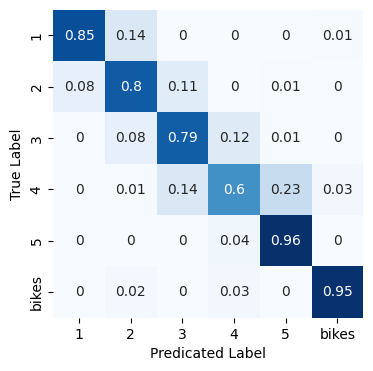

In [8]:
total_y_pred = np.load("data/aggr_pred_y_label_test_k2_frame_depth10_random_iter9_bikes.npy")
total_y_true = np.load("data/aggr_true_y_label_test_k2_frame_depth10_random_iter9_bikes.npy")
cm = confusion_matrix(total_y_true, total_y_pred, labels=SHAPE_NAMES)
cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) 
cm = cm.round(2)

SHAPE_LABELS = [1,2,3,4,5,"bikes"]
df_cm = pd.DataFrame(cm, index = SHAPE_LABELS,
            columns = SHAPE_LABELS)
plt.figure(figsize = (4,4))
plot = sn.heatmap(df_cm, annot=True, cmap='Blues',cbar=False)
figure = plot.get_figure()
# plt.title("Confusion matrix")
plt.ylabel('True Label')
plt.xlabel('Predicated Label')
plt.show()

In [10]:
data_points = np.array([d.y.item() for d in train_graphs[0]])
zeros = len(np.where(data_points  == 0)[0])
ones = len(np.where(data_points  == 1)[0])
twos = len(np.where(data_points  == 2)[0])
threes = len(np.where(data_points  == 3)[0]) 
fours = len(np.where(data_points  == 4)[0])
bikes = len(np.where(data_points  == 5)[0])

labels = [1,2,3,4,5, 6]
sample_num = [zeros, ones, twos, threes, fours,bikes]
p = plt.bar(labels, sample_num)
plt.xlabel("Number of people")
plt.ylabel("Number of samples")
plt.bar_label(p)
plt.show()

NameError: name 'train_graphs' is not defined

In [31]:
res = np.load("data/results_k8_frame_depth10_random.npy")
print([f"{r:.4f}" for r in res])

['5700.0000', '823.0458', '0.8262', '0.7569']


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
reduced_cols = ['doppler','snr','x','y','current_frame','Label']
column_names=['range','azimuth','doppler','snr','x','y','current_frame','seq', 'Label']
selected_cols = ['doppler','snr','x','y']
SHAPE_NAMES = [0,1,2,3,4, 5]
frame_depths = [8,8,8,8,8] 
ks = [4]
num_chunks = 16
lr = 0.001
max_epoch = 50
size = 64
split = 64
EARLY_STOPPING_PATIENCE = 10

File read
Total number of frames: 23442
Number of graphs generated with k = 4 and frame depth = 8 for type 0: 7467
Number of graphs generated with k = 4 and frame depth = 8 for type 1: 1318
Number of graphs generated with k = 4 and frame depth = 8 for type 2: 1355
trained: 0


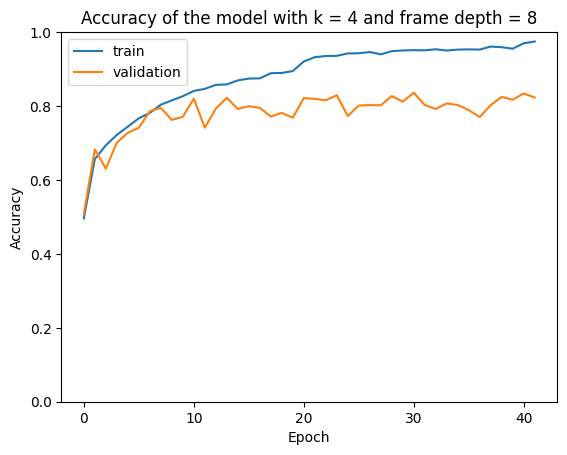

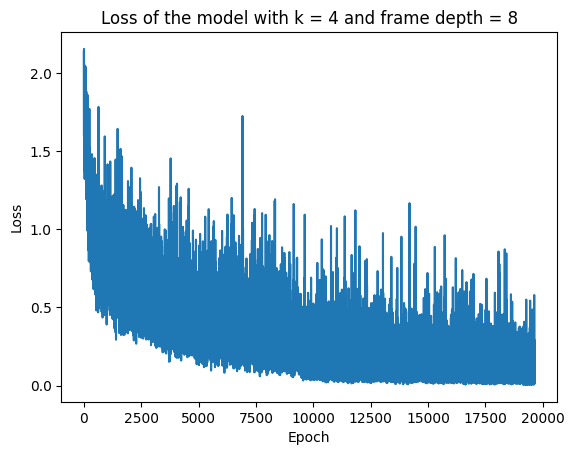

Training accuracy: 0.9745547073791349
Training loss: 0.06874161
Accuracy of the model with k = 4 and frame depth = 8: 0.8232
--- 1267.5628988742828 seconds ---
evaluated: 0
Val accuracy of the model with k = 4 and frame depth = 8: 0.8361


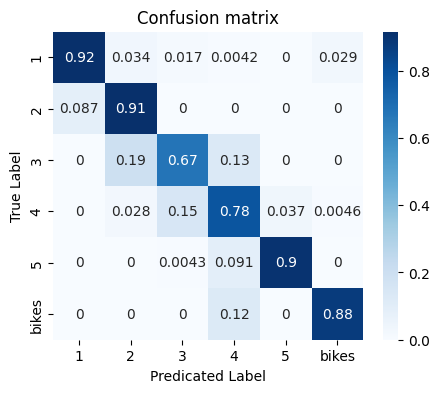

Test accuracy of the model with k = 4 and frame depth = 8: 0.7801


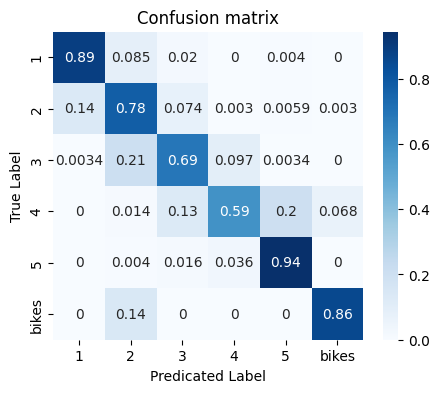

Number of graphs generated with k = 4 and frame depth = 8 for type 0: 7467
Number of graphs generated with k = 4 and frame depth = 8 for type 1: 1318
Number of graphs generated with k = 4 and frame depth = 8 for type 2: 1355
trained: 0


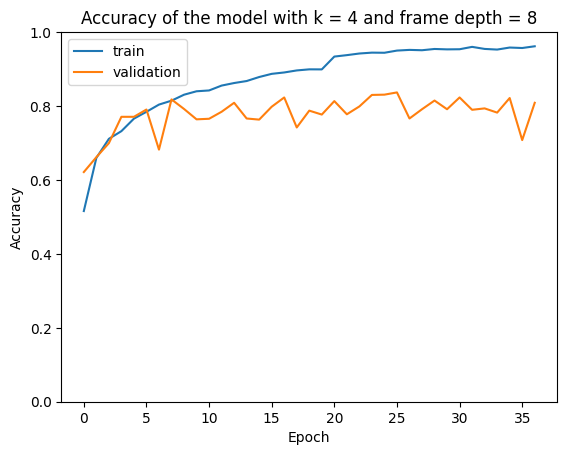

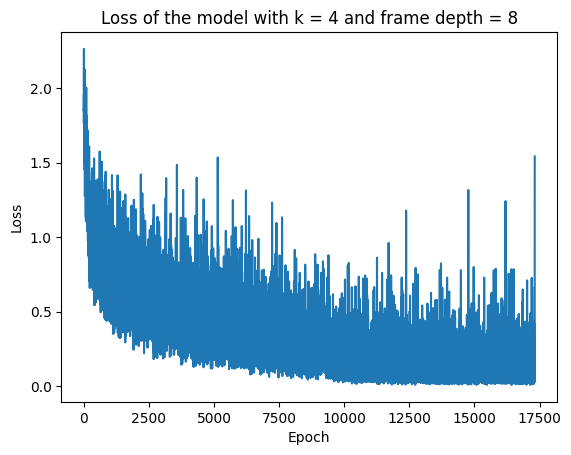

Training accuracy: 0.9616981384759609
Training loss: 1.5419122
Accuracy of the model with k = 4 and frame depth = 8: 0.8088
--- 1132.0008392333984 seconds ---
evaluated: 0
Val accuracy of the model with k = 4 and frame depth = 8: 0.8369


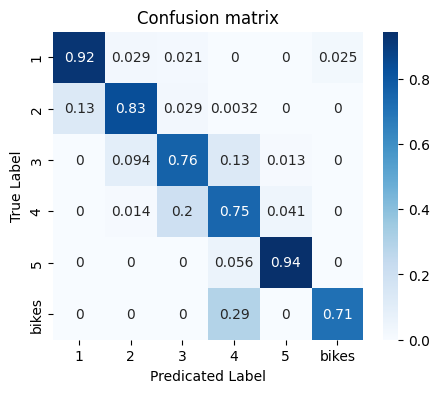

Test accuracy of the model with k = 4 and frame depth = 8: 0.8273


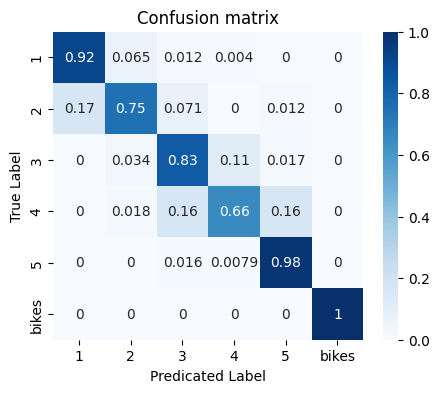

Number of graphs generated with k = 4 and frame depth = 8 for type 0: 7467
Number of graphs generated with k = 4 and frame depth = 8 for type 1: 1318
Number of graphs generated with k = 4 and frame depth = 8 for type 2: 1355
trained: 0


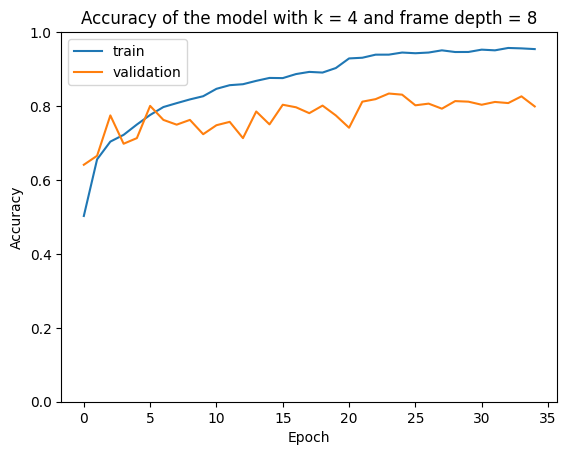

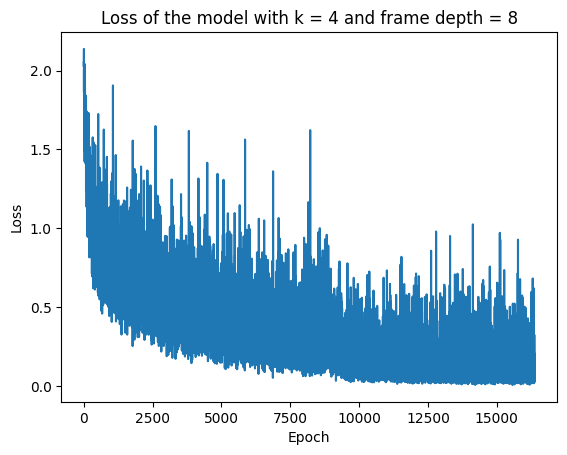

Training accuracy: 0.9540645506897013
Training loss: 0.03418753
Accuracy of the model with k = 4 and frame depth = 8: 0.7989
--- 1052.966905117035 seconds ---
evaluated: 0
Val accuracy of the model with k = 4 and frame depth = 8: 0.8338


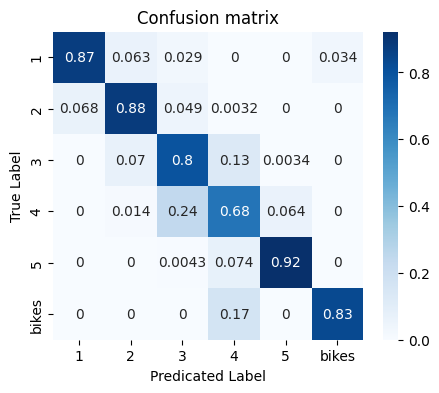

Test accuracy of the model with k = 4 and frame depth = 8: 0.8044


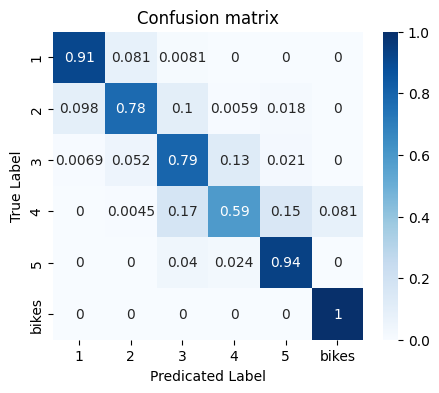

Number of graphs generated with k = 4 and frame depth = 8 for type 0: 7467
Number of graphs generated with k = 4 and frame depth = 8 for type 1: 1318
Number of graphs generated with k = 4 and frame depth = 8 for type 2: 1355
trained: 0


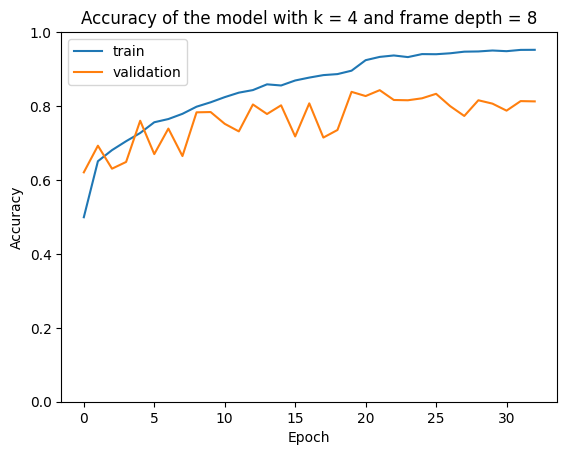

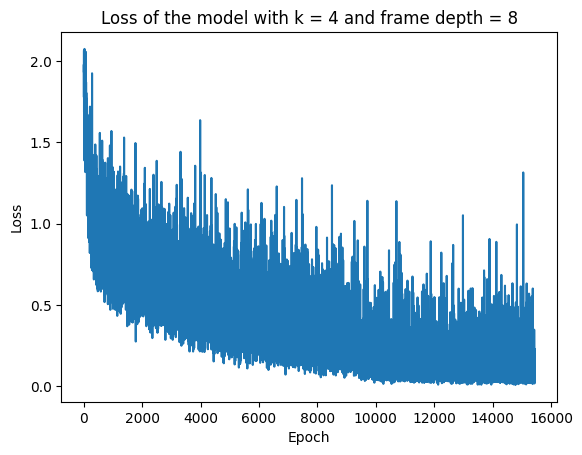

Training accuracy: 0.9521226730949511
Training loss: 0.055820238
Accuracy of the model with k = 4 and frame depth = 8: 0.8126
--- 1001.0361526012421 seconds ---
evaluated: 0
Val accuracy of the model with k = 4 and frame depth = 8: 0.8429


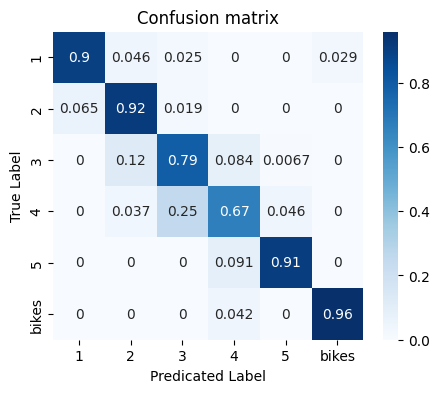

Test accuracy of the model with k = 4 and frame depth = 8: 0.8007


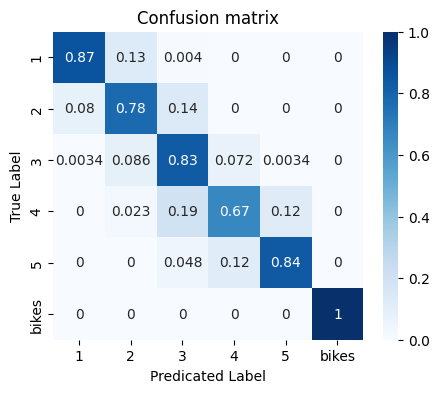

Number of graphs generated with k = 4 and frame depth = 8 for type 0: 7467
Number of graphs generated with k = 4 and frame depth = 8 for type 1: 1318
Number of graphs generated with k = 4 and frame depth = 8 for type 2: 1355
trained: 0


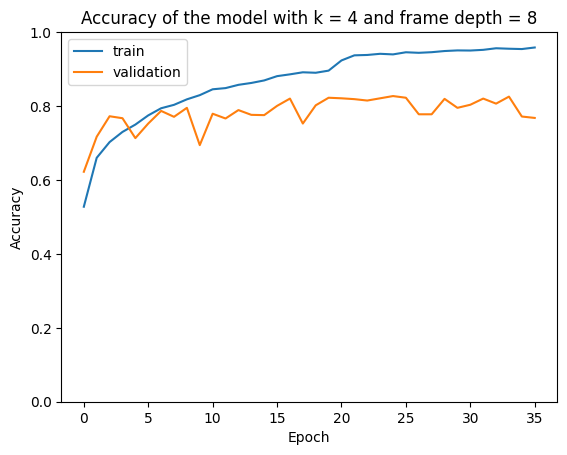

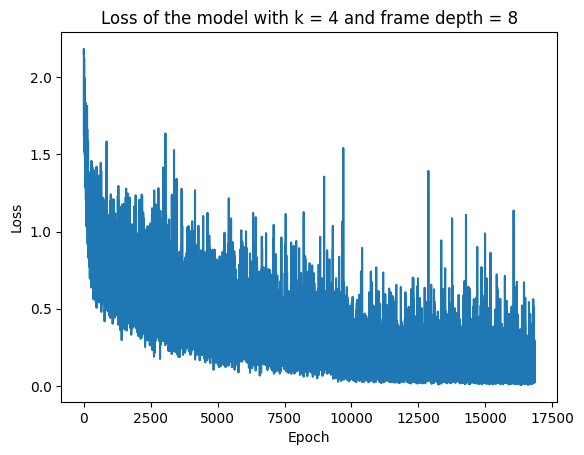

Training accuracy: 0.9584170349537967
Training loss: 0.06241483
Accuracy of the model with k = 4 and frame depth = 8: 0.7678
--- 1083.061529636383 seconds ---
evaluated: 0
Val accuracy of the model with k = 4 and frame depth = 8: 0.8270


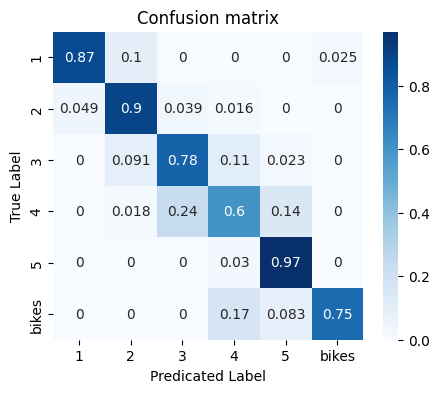

Test accuracy of the model with k = 4 and frame depth = 8: 0.8000


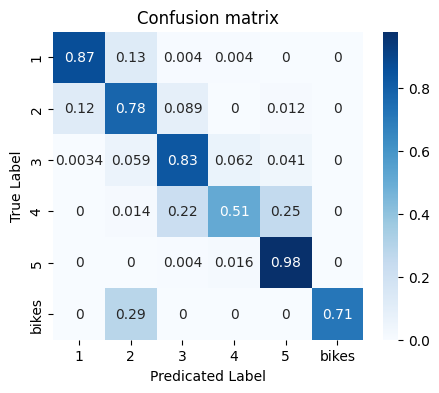

In [5]:
reload(utils)
try:
    point_frames = pd.read_csv("data/all_data.csv", names=column_names, header=None, dtype=np.float64)
    print("File read")
except Exception as e:
    point_frames = frame_loader.load_original_frames()
    print("Frames generated")

all_data_grouped = point_frames[reduced_cols].groupby("current_frame")
print("Total number of frames: "+str(len(all_data_grouped)))
data_array = [frame.to_numpy() for (_, frame) in all_data_grouped]

# Sort the data
sorted_data = sorted(data_array,key=lambda x:x[:,4].max(axis=0))

# Split the data
train, val, test = utils.split_with_chunks_list(sorted_data, SHAPE_NAMES, num_chunks, 0.15, 0.15)

aggr_true_y_label_val = []
aggr_pred_y_label_val = []
aggr_true_y_label_test = []
aggr_pred_y_label_test = []

for k in ks:
    for iter, fd in enumerate(frame_depths):
        results = np.empty(4)

        train_graphs, val_graphs, test_graphs = utils.load_graphs(train, val, test, [fd], [k], selected_cols, \
                                                          num_chunks, size, split, device, mode="random")
        
        results[0] = len(train_graphs[0])
        
        augmentation_transformer = augmentation.AugmentationTransformerList(size)
        augmented_graphs = augmentation_transformer(train_graphs[0])
        train_graphs[0].extend(augmented_graphs)

        train_dataloaders = []
        test_dataloaders = []
        val_dataloaders = []

        # Batch the sets
        for i in range(len(train_graphs)):
            random.seed(42)
            random.shuffle(train_graphs[i])
            random.seed(42)
            random.shuffle(test_graphs[i])
            random.seed(42)
            random.shuffle(val_graphs[i])
            
            train_dataloaders.append(DataLoader(train_graphs[i], batch_size=32, shuffle=True, num_workers = 0))
            test_dataloaders.append(DataLoader(test_graphs[i], batch_size=32, shuffle=True, num_workers = 0))
            val_dataloaders.append(DataLoader(val_graphs[i], batch_size=32, shuffle=True, num_workers = 0))
        

        for i, train_dataloader in enumerate(train_dataloaders):
            val_accuracies = []
            start_time = time.time()
            # k = ks[i % len(ks)]
            model = graph_neural_network.Net(6, k=k).to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
            scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

            best_acc = -1
            losses = []
            accuracies = []
            for epoch in range(max_epoch):
                correct = 0
                count = 0
                model.train()
                for train_batch in train_dataloader:
                    train_batch = train_batch.to(device)
                    optimizer.zero_grad()
                    out = model(train_batch)
                    pred = out.argmax(dim=1)
                    correct += (pred == train_batch.y).sum()
                    loss = F.nll_loss(out, train_batch.y)
                    losses.append(loss.detach())
                    loss.backward()
                    optimizer.step()
                    count += len(train_batch)
                acc = int(correct) / count
                losses.append(loss.detach())
                accuracies.append(acc)
                scheduler.step()

                model.eval()
                val_correct = 0
                for val_batch in val_dataloaders[i]:
                    val_batch = val_batch.to(device)
                    pred = model(val_batch).argmax(dim=1)
                    
                    val_correct += (pred == val_batch.y).sum()
                val_acc = int(val_correct) / len(val_dataloaders[i].dataset)
                val_accuracies.append(val_acc)

                if val_acc > best_acc:
                    best_acc = val_acc
                    best_model = model
                    torch.save(model, f"data/trained_model_k{k}_frame_depth{fd}_random_iter{iter}.pt")
                    last_improvement = 0
                else:
                    last_improvement += 1

                if last_improvement > EARLY_STOPPING_PATIENCE:
                    break
            
            losses = [tensor.cpu().numpy() for tensor in losses]
            print(f"trained: {i}")

            plt.plot(accuracies, label = "train")
            plt.plot(val_accuracies, label = "validation")
            plt.title(f"Accuracy of the model with k = {k} and frame depth = {fd}")
            plt.ylabel("Accuracy")
            plt.xlabel("Epoch")
            plt.ylim(0,1)
            plt.legend() 
            plt.show()

            plt.plot(losses)
            plt.title(f"Loss of the model with k = {k} and frame depth = {fd}")
            plt.ylabel("Loss")
            plt.xlabel("Epoch")
            plt.show()

            print("Training accuracy: "+str(accuracies[-1]))
            print("Training loss: "+str(losses[-1]))
            
            print(f'Accuracy of the model with k = {k} and frame depth = {fd}: {val_accuracies[-1]:.4f}')
            results[1] = time.time() - start_time
            print("--- %s seconds ---" % (time.time() - start_time))
            print(f"evaluated: {i}")

        best_model = torch.load( f"data/trained_model_k{k}_frame_depth{fd}_random_iter{iter}.pt")
        best_model.eval()
        total_y_pred_label = []
        total_y_true_label = []
        correct = 0
        for test_batch in val_dataloaders[i]:
            test_batch = test_batch.to(device)
            pred = best_model(test_batch).argmax(dim=1)
            
            total_y_pred_label.extend(pred)
            total_y_true_label.extend(test_batch.y)
            
            correct += (pred == test_batch.y).sum()
        acc = int(correct) / len(val_graphs[i])
        print(f'Val accuracy of the model with k = {k} and frame depth = {fd}: {acc:.4f}')
        results[2] = acc

        SHAPE_LABELS = [1,2,3,4,5,"bikes"]
        total_y_pred = [pred_label.item() for pred_label in total_y_pred_label]
        total_y_true = [true_label.item() for true_label in total_y_true_label]
        cm = confusion_matrix(total_y_true, total_y_pred, labels=SHAPE_NAMES)
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) 

        df_cm = pd.DataFrame(cm, index = SHAPE_LABELS,
                    columns = SHAPE_LABELS)
        plt.figure(figsize = (5,4))
        plot = sn.heatmap(df_cm, annot=True, cmap='Blues')
        figure = plot.get_figure()
        plt.title("Confusion matrix")
        plt.ylabel('True Label')
        plt.xlabel('Predicated Label')
        plt.show()
        aggr_true_y_label_val.extend(total_y_true)
        aggr_pred_y_label_val.extend(total_y_pred)
        np.save(f"data/aggr_true_y_label_val_k{k}_frame_depth{fd}_random_iter{iter}.npy", aggr_true_y_label_val)
        np.save(f"data/aggr_pred_y_label_val_k{k}_frame_depth{fd}_random_iter{iter}.npy", aggr_pred_y_label_val)

        best_model.eval()
        total_y_pred_label = []
        total_y_true_label = []
        correct = 0
        for test_batch in test_dataloaders[i]:
            test_batch = test_batch.to(device)
            pred = best_model(test_batch).argmax(dim=1)
            
            total_y_pred_label.extend(pred)
            total_y_true_label.extend(test_batch.y)
            
            correct += (pred == test_batch.y).sum()
        test_acc = int(correct) / len(test_graphs[i])
        print(f'Test accuracy of the model with k = {k} and frame depth = {fd}: {test_acc:.4f}')
        results[3] = test_acc

        np.save(f"data/results_k{k}_frame_depth{fd}_random_iter{iter}.npy", results)

        SHAPE_LABELS = [1,2,3,4,5,"bikes"]
        total_y_pred = [pred_label.item() for pred_label in total_y_pred_label]
        total_y_true = [true_label.item() for true_label in total_y_true_label]
        cm = confusion_matrix(total_y_true, total_y_pred, labels=SHAPE_NAMES)
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) 

        df_cm = pd.DataFrame(cm, index = SHAPE_LABELS,
                    columns = SHAPE_LABELS)
        plt.figure(figsize = (5,4))
        plot = sn.heatmap(df_cm, annot=True, cmap='Blues')
        figure = plot.get_figure()
        plt.title("Confusion matrix")
        plt.ylabel('True Label')
        plt.xlabel('Predicated Label')
        plt.show()
        aggr_true_y_label_test.extend(total_y_true)
        aggr_pred_y_label_test.extend(total_y_pred)
        np.save(f"data/aggr_true_y_label_test_k{k}_frame_depth{fd}_random_iter{iter}.npy", aggr_true_y_label_test)
        np.save(f"data/aggr_pred_y_label_test_k{k}_frame_depth{fd}_random_iter{iter}.npy", aggr_pred_y_label_test)

        del train_graphs
        del val_graphs
        del test_graphs
        del train_dataloaders
        del val_dataloaders
        del test_dataloaders
        del model
        del best_model
        
        gc.collect()
        torch.cuda.empty_cache()


File read


Total number of frames: 23442
Number of graphs generated with k = 2 and frame depth = 12 for type 0: 5086
Number of graphs generated with k = 2 and frame depth = 12 for type 1: 794
Number of graphs generated with k = 2 and frame depth = 12 for type 2: 824
trained: 0


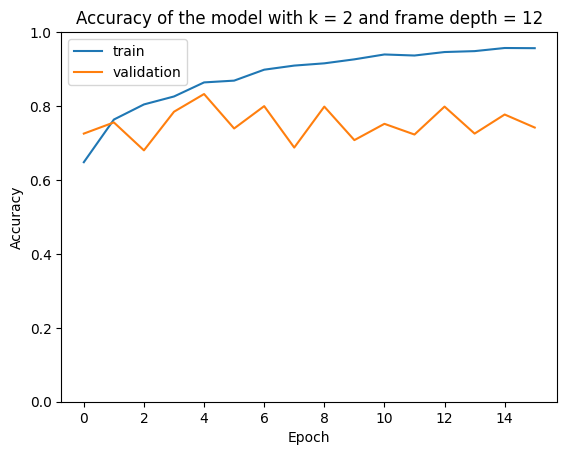

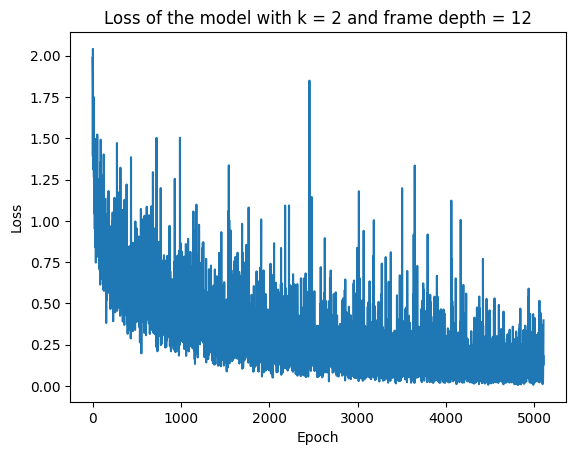

Training accuracy: 0.956547384978372
Training loss: 0.39783663
Accuracy of the model with k = 2 and frame depth = 12: 0.7418
--- 347.9151244163513 seconds ---
evaluated: 0
Val accuracy of the model with k = 2 and frame depth = 12: 0.8325


/tmp/ipykernel_870875/1495547130.py:148: RuntimeWarning: invalid value encountered in divide
  cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])


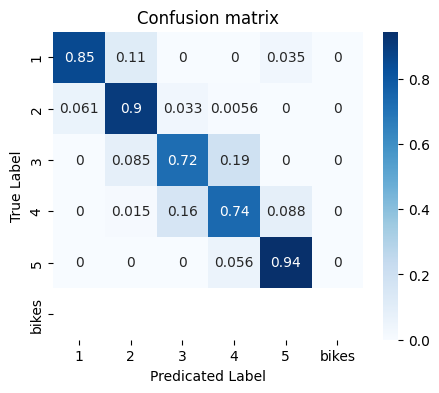

Test accuracy of the model with k = 2 and frame depth = 12: 0.8070


/tmp/ipykernel_870875/1495547130.py:182: RuntimeWarning: invalid value encountered in divide
  cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])


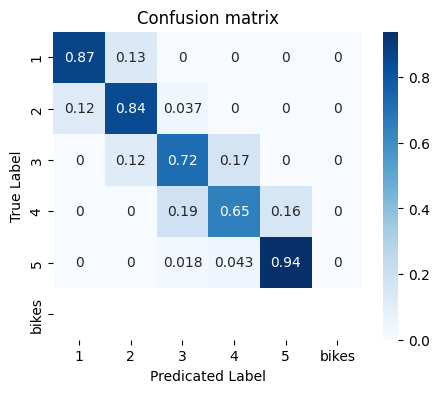

Number of graphs generated with k = 4 and frame depth = 12 for type 0: 4886
Number of graphs generated with k = 4 and frame depth = 12 for type 1: 753
Number of graphs generated with k = 4 and frame depth = 12 for type 2: 796
trained: 0


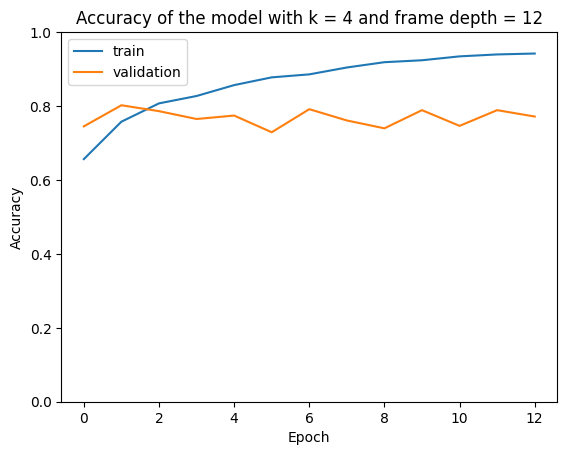

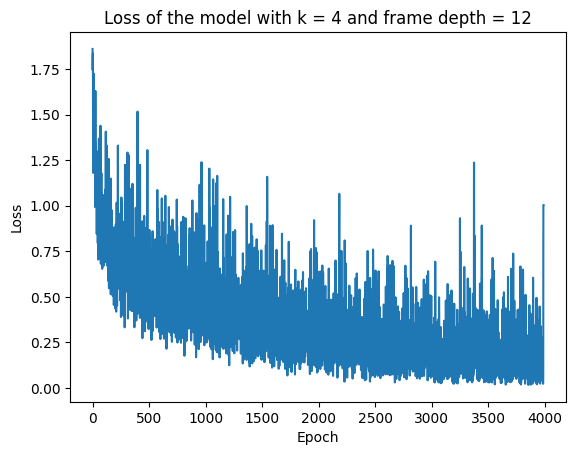

Training accuracy: 0.9420794105607859
Training loss: 1.0037556
Accuracy of the model with k = 4 and frame depth = 12: 0.7716
--- 384.97897148132324 seconds ---
evaluated: 0
Val accuracy of the model with k = 4 and frame depth = 12: 0.8021


/tmp/ipykernel_870875/1495547130.py:148: RuntimeWarning: invalid value encountered in divide
  cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])


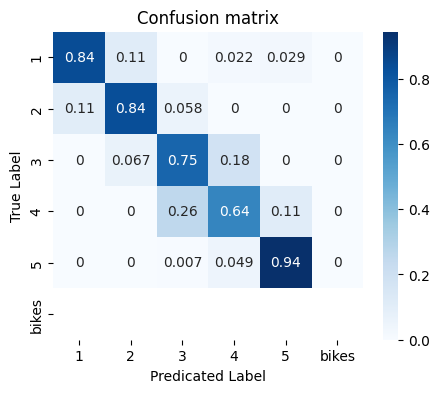

Test accuracy of the model with k = 4 and frame depth = 12: 0.8103


/tmp/ipykernel_870875/1495547130.py:182: RuntimeWarning: invalid value encountered in divide
  cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])


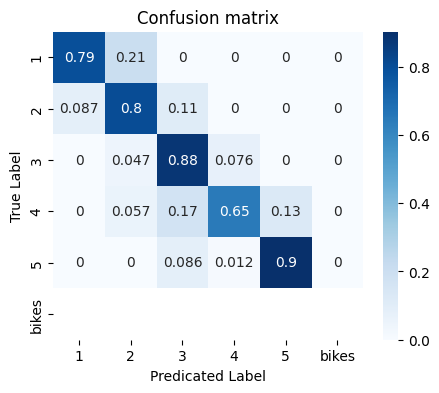

Number of graphs generated with k = 8 and frame depth = 12 for type 0: 4600
Number of graphs generated with k = 8 and frame depth = 12 for type 1: 704
Number of graphs generated with k = 8 and frame depth = 12 for type 2: 746
trained: 0


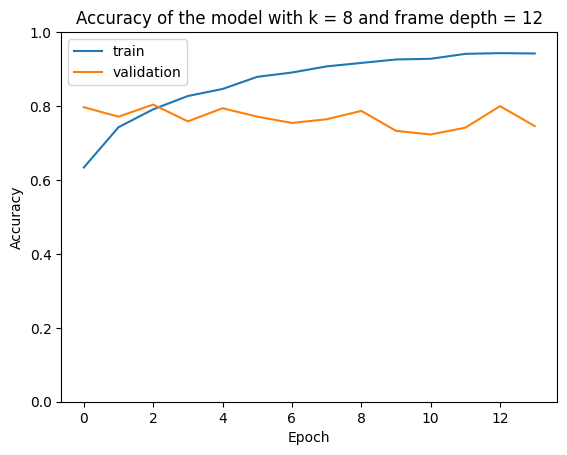

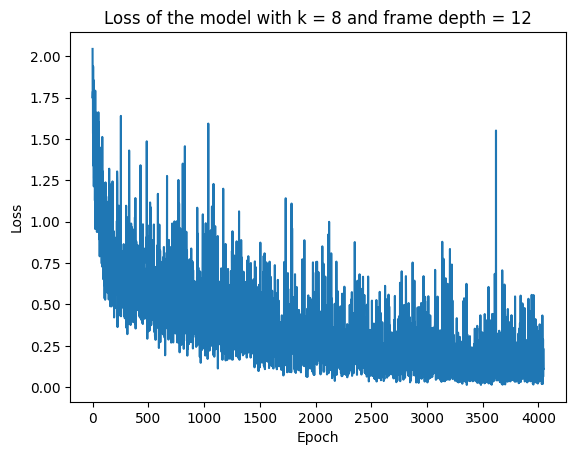

Training accuracy: 0.9421739130434783
Training loss: 0.1096004
Accuracy of the model with k = 8 and frame depth = 12: 0.7457
--- 658.9038441181183 seconds ---
evaluated: 0
Val accuracy of the model with k = 8 and frame depth = 12: 0.8040


/tmp/ipykernel_870875/1495547130.py:148: RuntimeWarning: invalid value encountered in divide
  cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])


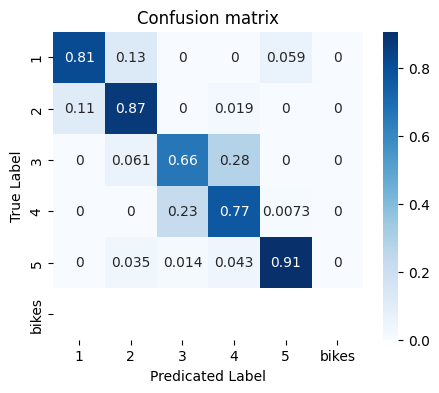

Test accuracy of the model with k = 8 and frame depth = 12: 0.7842


/tmp/ipykernel_870875/1495547130.py:182: RuntimeWarning: invalid value encountered in divide
  cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])


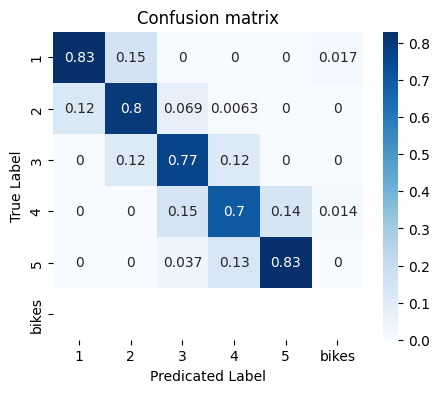

In [5]:
try:
    point_frames = pd.read_csv("data/all_data.csv", names=column_names, header=None, dtype=np.float64)
    print("File read")
except Exception as e:
    point_frames = frame_loader.load_original_frames()
    print("Frames generated")

all_data_grouped = point_frames[reduced_cols].groupby("current_frame")
print("Total number of frames: "+str(len(all_data_grouped)))
data_array = [frame.to_numpy() for (_, frame) in all_data_grouped]

# Sort the data
sorted_data = sorted(data_array,key=lambda x:x[:,4].max(axis=0))

# Split the data
train, val, test = utils.split_with_chunks_list(sorted_data, SHAPE_NAMES, num_chunks, 0.15, 0.15)

for k in ks:
    for fd in frame_depths:
        results = np.empty(4)

        train_graphs, val_graphs, test_graphs = utils.load_graphs(train, val, test, [fd], [k], selected_cols, \
                                                          num_chunks, size, split, device, mode="desc")
        
        results[0] = len(train_graphs[0])
        
        augmentation_transformer = augmentation.AugmentationTransformerList(size)
        augmented_graphs = augmentation_transformer(train_graphs[0])
        train_graphs[0].extend(augmented_graphs)

        train_dataloaders = []
        test_dataloaders = []
        val_dataloaders = []

        # Batch the sets
        for i in range(len(train_graphs)):
            random.seed(42)
            random.shuffle(train_graphs[i])
            random.seed(42)
            random.shuffle(test_graphs[i])
            random.seed(42)
            random.shuffle(val_graphs[i])
            
            train_dataloaders.append(DataLoader(train_graphs[i], batch_size=32, shuffle=True, num_workers = 0))
            test_dataloaders.append(DataLoader(test_graphs[i], batch_size=32, shuffle=True, num_workers = 0))
            val_dataloaders.append(DataLoader(val_graphs[i], batch_size=32, shuffle=True, num_workers = 0))
        

        for i, train_dataloader in enumerate(train_dataloaders):
            val_accuracies = []
            start_time = time.time()
            # k = ks[i % len(ks)]
            model = graph_neural_network.Net(6, k=k).to(device)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
            scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

            best_acc = -1
            losses = []
            accuracies = []
            for epoch in range(max_epoch):
                correct = 0
                count = 0
                model.train()
                for train_batch in train_dataloader:
                    train_batch = train_batch.to(device)
                    optimizer.zero_grad()
                    out = model(train_batch)
                    pred = out.argmax(dim=1)
                    correct += (pred == train_batch.y).sum()
                    loss = F.nll_loss(out, train_batch.y)
                    losses.append(loss.detach())
                    loss.backward()
                    optimizer.step()
                    count += len(train_batch)
                acc = int(correct) / count
                losses.append(loss.detach())
                accuracies.append(acc)
                scheduler.step()

                model.eval()
                val_correct = 0
                for val_batch in val_dataloaders[i]:
                    val_batch = val_batch.to(device)
                    pred = model(val_batch).argmax(dim=1)
                    
                    val_correct += (pred == val_batch.y).sum()
                val_acc = int(val_correct) / len(val_dataloaders[i].dataset)
                val_accuracies.append(val_acc)

                if val_acc > best_acc:
                    best_acc = val_acc
                    best_model = model
                    torch.save(model, f"data/trained_model_k{k}_frame_depth{fd}_max.pt")
                    last_improvement = 0
                else:
                    last_improvement += 1

                if last_improvement > EARLY_STOPPING_PATIENCE:
                    break
            
            losses = [tensor.cpu().numpy() for tensor in losses]
            print(f"trained: {i}")

            plt.plot(accuracies, label = "train")
            plt.plot(val_accuracies, label = "validation")
            plt.title(f"Accuracy of the model with k = {k} and frame depth = {fd}")
            plt.ylabel("Accuracy")
            plt.xlabel("Epoch")
            plt.ylim(0,1)
            plt.legend() 
            plt.show()

            plt.plot(losses)
            plt.title(f"Loss of the model with k = {k} and frame depth = {fd}")
            plt.ylabel("Loss")
            plt.xlabel("Epoch")
            plt.show()

            print("Training accuracy: "+str(accuracies[-1]))
            print("Training loss: "+str(losses[-1]))
            
            print(f'Accuracy of the model with k = {k} and frame depth = {fd}: {val_accuracies[-1]:.4f}')
            results[1] = time.time() - start_time
            print("--- %s seconds ---" % (time.time() - start_time))
            print(f"evaluated: {i}")

        best_model = torch.load( f"data/trained_model_k{k}_frame_depth{fd}_max.pt")
        best_model.eval()
        total_y_pred_label = []
        total_y_true_label = []
        correct = 0
        for test_batch in val_dataloaders[i]:
            test_batch = test_batch.to(device)
            pred = best_model(test_batch).argmax(dim=1)
            
            total_y_pred_label.extend(pred)
            total_y_true_label.extend(test_batch.y)
            
            correct += (pred == test_batch.y).sum()
        acc = int(correct) / len(val_graphs[i])
        print(f'Val accuracy of the model with k = {k} and frame depth = {fd}: {acc:.4f}')
        results[2] = acc

        SHAPE_LABELS = [1,2,3,4,5,"bikes"]
        total_y_pred = [pred_label.item() for pred_label in total_y_pred_label]
        total_y_true = [true_label.item() for true_label in total_y_true_label]
        cm = confusion_matrix(total_y_true, total_y_pred, labels=SHAPE_NAMES)
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) 

        df_cm = pd.DataFrame(cm, index = SHAPE_LABELS,
                    columns = SHAPE_LABELS)
        plt.figure(figsize = (5,4))
        plot = sn.heatmap(df_cm, annot=True, cmap='Blues')
        figure = plot.get_figure()
        plt.title("Confusion matrix")
        plt.ylabel('True Label')
        plt.xlabel('Predicated Label')
        plt.show()

        best_model.eval()
        total_y_pred_label = []
        total_y_true_label = []
        correct = 0
        for test_batch in test_dataloaders[i]:
            test_batch = test_batch.to(device)
            pred = best_model(test_batch).argmax(dim=1)
            
            total_y_pred_label.extend(pred)
            total_y_true_label.extend(test_batch.y)
            
            correct += (pred == test_batch.y).sum()
        test_acc = int(correct) / len(test_graphs[i])
        print(f'Test accuracy of the model with k = {k} and frame depth = {fd}: {test_acc:.4f}')
        results[3] = test_acc

        np.save(f"data/results_k{k}_frame_depth{fd}_max.npy", results)

        SHAPE_LABELS = [1,2,3,4,5,"bikes"]
        total_y_pred = [pred_label.item() for pred_label in total_y_pred_label]
        total_y_true = [true_label.item() for true_label in total_y_true_label]
        cm = confusion_matrix(total_y_true, total_y_pred, labels=SHAPE_NAMES)
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) 

        df_cm = pd.DataFrame(cm, index = SHAPE_LABELS,
                    columns = SHAPE_LABELS)
        plt.figure(figsize = (5,4))
        plot = sn.heatmap(df_cm, annot=True, cmap='Blues')
        figure = plot.get_figure()
        plt.title("Confusion matrix")
        plt.ylabel('True Label')
        plt.xlabel('Predicated Label')
        plt.show()

        del train_graphs
        del val_graphs
        del test_graphs
        del train_dataloaders
        del val_dataloaders
        del test_dataloaders
        del model
        del best_model
        
        gc.collect()
        torch.cuda.empty_cache()

In [3]:
reload(frame_loader)
reload(utils)
# Load equal frames
# try:
#     point_frames = pd.read_csv(f"data/frames_{size}points_all_varied_fixed.csv", names=column_names, header=None, dtype=np.float64)
#     print("File read")
# except Exception as e:
#     point_frames = frame_loader.equal_frame_loader(column_names,size)
#     print("Frames generated")

try:
    point_frames = pd.read_csv("data/all_data.csv", names=column_names, header=None, dtype=np.float64)
    print("File read")
except Exception as e:
    point_frames = frame_loader.load_original_frames()
    print("Frames generated")

# Normalize the data
# norm_frames = utils.min_max_normalization(point_frames, selected_cols)

# group the data by frame numbers
all_data_grouped = point_frames[reduced_cols].groupby("current_frame")
print("Total number of frames: "+str(len(all_data_grouped)))
data_array = [frame.to_numpy() for (_, frame) in all_data_grouped]

# Sort the data
sorted_data = sorted(data_array,key=lambda x:x[:,4].max(axis=0))
# xy_sorted = [sorted(x,key=lambda x:[x[3], x[2]]) for x in sorted_data]
# xy_dist = [x[:,2]+x[:,3] for x in sorted_data]
# xy_sort_index = [d.argsort() for d in xy_dist]
# xy_sorted = np.array([frame[xy_sort_index[i]] for i, frame in enumerate(sorted_data)])

# Split the data
train, val, test = utils.split_with_chunks_list(sorted_data, SHAPE_NAMES, num_chunks, 0.15, 0.15)


File read
Total number of frames: 23442


In [23]:
losswefes = 0

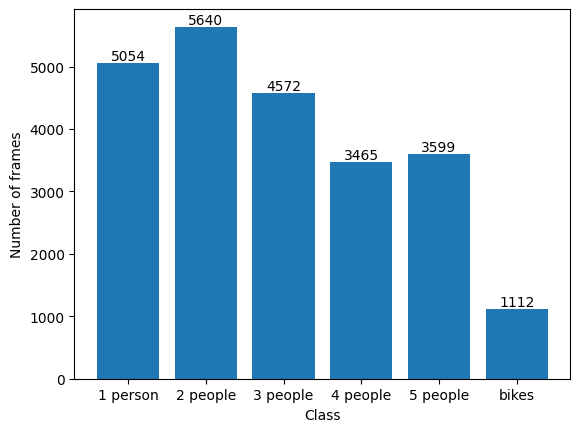

In [17]:
# data_points = np.array([data[0,5] for data in sorted_data])
# zeros = len(np.where(data_points  == 0)[0])
# ones = len(np.where(data_points  == 1)[0])
# twos = len(np.where(data_points  == 2)[0])
# threes = len(np.where(data_points  == 3)[0]) 
# fours = len(np.where(data_points  == 4)[0])
# fives = len(np.where(data_points  == 5)[0])

labels = [ "1 person","2 people","3 people","4 people", "5 people","bikes"]
sample_num = [zeros, ones, twos, threes, fours, fives]
p = plt.bar(labels, sample_num)
plt.xticks(ticks=[0,1,2,3,4,5], labels=labels)
plt.xlabel("Class")
plt.ylabel("Number of frames")
plt.bar_label(p)
plt.show()

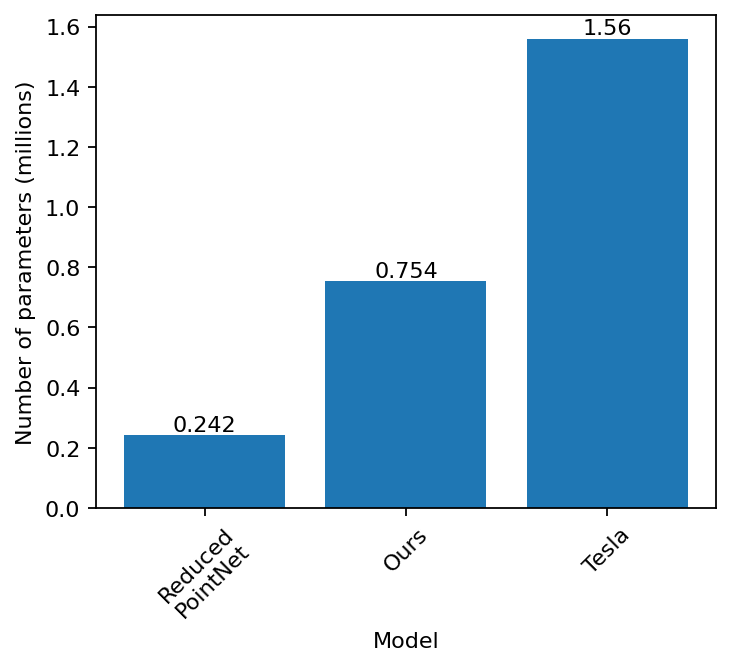

In [23]:
labels = [ "Reduced\nPointNet","Ours","Tesla"]
sample_num = [0.242, 0.754, 1.56]
plt.figure(figsize = (5,4), dpi=160)
p = plt.bar(labels, sample_num)
plt.xticks(ticks=[0,1,2], rotation = 45, labels=labels)
plt.xlabel("Model")
plt.ylabel("Number of parameters (millions)")
plt.bar_label(p)
plt.show()

In [ ]:
reload(utils)

# Create graphs for each sets with each hyperparameter combination
train_graphs, val_graphs, test_graphs = utils.load_graphs(train, val, test, frame_depths, ks, selected_cols, \
                                                          num_chunks, size, split, device, mode="desc")

#### Data augmentation

In [5]:
reload(augmentation)
    
# augment with random graphs
augmentation_transformer = augmentation.AugmentationTransformerList(size)
# four_graph_loc = np.array([data.y.cpu() == 3 for data in train_graphs[0]])
# four_index = np.where(four_graph_loc)[0].tolist()
# four_graphs = [train_graphs[0][i] for i in four_index]

# bike_graph_loc = np.array([data.y.cpu() == 5 for data in train_graphs[0]])
# bike_index = np.where(bike_graph_loc)[0].tolist()
# bike_graphs = [train_graphs[0][i] for i in bike_index]

# indexes = np.arange(len(train_graphs[0])).tolist()
# random.seed(42)
# sample_train = random.sample(indexes, 1000)
# sample_train = [train_graphs[0][i] for i in sample_train]

augmented_graphs = augmentation_transformer(train_graphs[0])
train_graphs[0].extend(augmented_graphs)

# # augment with random graphs from 4 people
# indexes = np.arange(len(four_graphs)).tolist()
# random.seed(42)
# sample_four = random.sample(indexes, 500)
# sample_four = [four_graphs[i] for i in sample_four]

# augmented_four = augmentation_transformer(sample_four)
# train_graphs[0].extend(augmented_four)

# # augment with random graphs from bikes
# indexes = np.arange(len(bike_graphs)).tolist()
# random.seed(42)
# sample_bike = random.sample(indexes, 100)
# sample_bike = [bike_graphs[i] for i in sample_bike]

# augmented_bike = augmentation_transformer(sample_bike)
# train_graphs[0].extend(augmented_bike)


In [6]:
train_dataloaders = []
test_dataloaders = []
val_dataloaders = []

# Batch the sets
for i in range(len(train_graphs)):
    random.seed(42)
    random.shuffle(train_graphs[i])
    random.seed(42)
    random.shuffle(test_graphs[i])
    random.seed(42)
    random.shuffle(val_graphs[i])
    
    train_dataloaders.append(DataLoader(train_graphs[i], batch_size=32, shuffle=True, num_workers = 0))
    test_dataloaders.append(DataLoader(test_graphs[i], batch_size=32, shuffle=True, num_workers = 0))
    val_dataloaders.append(DataLoader(val_graphs[i], batch_size=32, shuffle=True, num_workers = 0))


#### Train the model

trained: 0


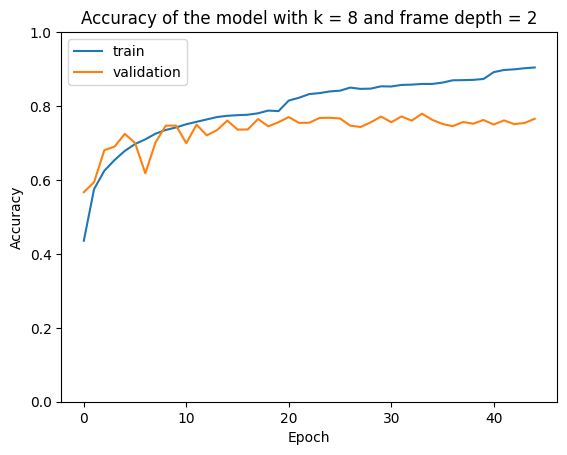

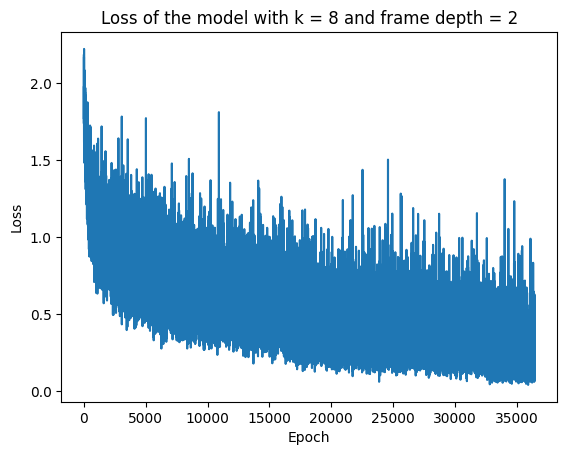

Training accuracy: 0.9043293390027058
Training loss: 0.38802776
Accuracy of the model with k = 8 and frame depth = 2: 0.7656
--- 1337.4992747306824 seconds ---
evaluated: 0


In [7]:
reload(graph_neural_network)
models = []

for i, train_dataloader in enumerate(train_dataloaders):
    val_accuracies = []
    start_time = time.time()
    k = ks[i % len(ks)]
    model = graph_neural_network.Net(6, k=k).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

    best_acc = -1
    losses = []
    accuracies = []
    for epoch in range(max_epoch):
        correct = 0
        count = 0
        model.train()
        for train_batch in train_dataloader:
            train_batch = train_batch.to(device)
            optimizer.zero_grad()
            out = model(train_batch)
            pred = out.argmax(dim=1)
            correct += (pred == train_batch.y).sum()
            loss = F.nll_loss(out, train_batch.y)
            losses.append(loss.detach())
            loss.backward()
            optimizer.step()
            count += len(train_batch)
        acc = int(correct) / count
        losses.append(loss.detach())
        accuracies.append(acc)
        scheduler.step()

        model.eval()
        val_correct = 0
        for val_batch in val_dataloaders[i]:
            val_batch = val_batch.to(device)
            pred = model(val_batch).argmax(dim=1)
            
            val_correct += (pred == val_batch.y).sum()
        val_acc = int(val_correct) / len(val_dataloaders[i].dataset)
        val_accuracies.append(val_acc)

        if val_acc > best_acc:
            best_acc = val_acc
            best_model = model
            torch.save(model, f"data/trained_model_k{k}_frame_depth{frame_depths[int(i/len(ks))]}_normalized_split{split}_one_to_one.pt")
            last_improvement = 0
        else:
            last_improvement += 1

        if last_improvement > EARLY_STOPPING_PATIENCE:
            break
    
    models.append(model)
    losses = [tensor.cpu().numpy() for tensor in losses]
    print(f"trained: {i}")

    plt.plot(accuracies, label = "train")
    plt.plot(val_accuracies, label = "validation")
    plt.title(f"Accuracy of the model with k = {ks[i % len(ks)]} and frame depth = {frame_depths[int(i/len(ks))]}")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.ylim(0,1)
    plt.legend() 
    plt.show()

    plt.plot(losses)
    plt.title(f"Loss of the model with k = {ks[i % len(ks)]} and frame depth = {frame_depths[int(i/len(ks))]}")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.show()

    print("Training accuracy: "+str(accuracies[-1]))
    print("Training loss: "+str(losses[-1]))
    
    print(f'Accuracy of the model with k = {ks[i % len(ks)]} and frame depth = {frame_depths[int(i/len(ks))]}: {val_accuracies[-1]:.4f}')
    print("--- %s seconds ---" % (time.time() - start_time))
    print(f"evaluated: {i}")

#### Evaluate the model on the test set

In [21]:
# del val_dataloaders
import gc
gc.collect()
torch.cuda.empty_cache()

In [8]:
best_model = torch.load( f"data/trained_model_k{ks[0]}_frame_depth{frame_depths[0]}_normalized_split64_one_to_one.pt")

In [11]:
best_model.eval()
total_y_pred_label = []
total_y_true_label = []
correct = 0
for test_batch in test_dataloaders[i]:
    test_batch = test_batch.to(device)
    pred = best_model(test_batch).argmax(dim=1)
    
    total_y_pred_label.extend(pred)
    total_y_true_label.extend(test_batch.y)
    
    correct += (pred == test_batch.y).sum()
acc = int(correct) / len(test_graphs[i])
print(f'Accuracy of the model with k = {ks[i % len(ks)]} and frame depth = {frame_depths[int(i/len(ks))]}: {acc:.4f}')

Accuracy of the model with k = 8 and frame depth = 2: 0.7555


#### Confusion matrix

Text(0.5, 14.722222222222216, 'Predicated Label')

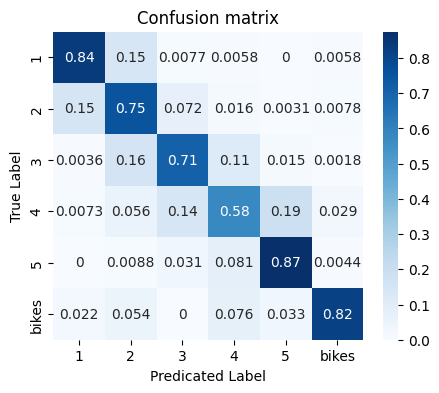

In [12]:
SHAPE_LABELS = [1,2,3,4,5,"bikes"]
total_y_pred = [pred_label.item() for pred_label in total_y_pred_label]
total_y_true = [true_label.item() for true_label in total_y_true_label]
cm = confusion_matrix(total_y_true, total_y_pred, labels=SHAPE_NAMES)
cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) 

df_cm = pd.DataFrame(cm, index = SHAPE_LABELS,
              columns = SHAPE_LABELS)
plt.figure(figsize = (5,4))
plot = sn.heatmap(df_cm, annot=True, cmap='Blues')
figure = plot.get_figure()
plt.title("Confusion matrix")
plt.ylabel('True Label')
plt.xlabel('Predicated Label')

#### Distribution of the train data

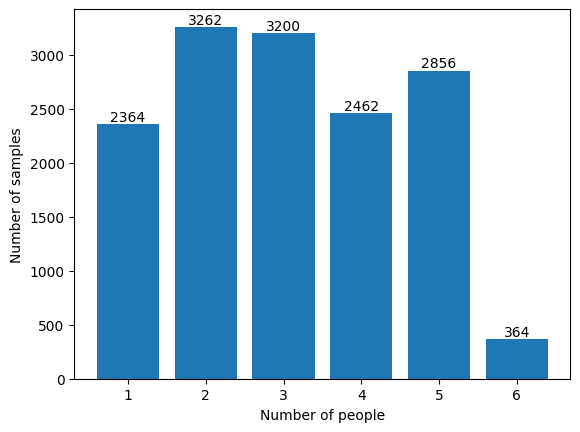

In [8]:
data_points = np.array([d.y.item() for d in train_graphs[0]])
zeros = len(np.where(data_points  == 0)[0])
ones = len(np.where(data_points  == 1)[0])
twos = len(np.where(data_points  == 2)[0])
threes = len(np.where(data_points  == 3)[0]) 
fours = len(np.where(data_points  == 4)[0])
bikes = len(np.where(data_points  == 5)[0])

labels = [1,2,3,4,5, 6]
sample_num = [zeros, ones, twos, threes, fours,bikes]
p = plt.bar(labels, sample_num)
plt.xlabel("Number of people")
plt.ylabel("Number of samples")
plt.bar_label(p)
plt.show()

In [44]:
column_names=['range','azimuth','doppler','snr','x','y','current_frame','seq']
features1 =  [pd.read_csv(filename, names=column_names, header=None, dtype=np.float64) for filename in glob.glob("data/3/3/*.csv")]
fnum_list = [feat["current_frame"][0] for feat in features1]
first = np.array([feat["seq"][0] == 0 for feat in features1])
first = np.where(first)[0]
fnum_list = [fnum_list[i] for i in first]
features1 = [features1[i] for i in first]
fnum = np.array(fnum_list)
print(len(fnum))
unique, counts = np.unique(fnum, return_counts=True)
dict_fnum = dict(zip(unique, counts))
multiple = {k: v for k, v in dict_fnum.items() if v > 1 }
print(len(unique))
print(multiple)
mul = list(multiple.keys())[4]
print(mul)
print(fnum_list.index(mul))
print(fnum_list.index(mul) + fnum_list[fnum_list.index(mul)+1:].index(mul))
identity = [features1[fnum_list.index(mul)], features1[fnum_list.index(mul) + fnum_list[fnum_list.index(mul)+1:].index(mul)+1]]
print(identity)

3879
3747
{85629.0: 2, 85631.0: 2, 85633.0: 2, 85635.0: 2, 85637.0: 2, 85639.0: 2, 85649.0: 2, 85663.0: 2, 85893.0: 2, 85895.0: 2, 85897.0: 2, 85899.0: 2, 85901.0: 2, 85903.0: 2, 86071.0: 2, 86081.0: 2, 86083.0: 2, 86085.0: 2, 86087.0: 2, 86089.0: 2, 86091.0: 2, 86093.0: 2, 86463.0: 2, 86465.0: 2, 86467.0: 2, 86469.0: 2, 86471.0: 2, 110425.0: 2, 110427.0: 2, 110429.0: 2, 110431.0: 2, 110433.0: 2, 110435.0: 2, 110437.0: 2, 110449.0: 2, 110451.0: 2, 110453.0: 2, 110455.0: 2, 110457.0: 2, 110459.0: 2, 110461.0: 2, 110463.0: 2, 110805.0: 2, 110807.0: 2, 110809.0: 2, 110819.0: 2, 110829.0: 2, 110831.0: 2, 110833.0: 2, 110835.0: 2, 110837.0: 2, 110845.0: 2, 110847.0: 2, 111185.0: 2, 111187.0: 2, 111189.0: 2, 111191.0: 2, 111201.0: 2, 111203.0: 2, 111211.0: 2, 111213.0: 2, 111215.0: 2, 111217.0: 2, 111219.0: 2, 111377.0: 2, 111563.0: 2, 111565.0: 2, 111567.0: 2, 111569.0: 2, 111571.0: 2, 111581.0: 2, 111589.0: 2, 111591.0: 2, 111593.0: 2, 111945.0: 2, 111947.0: 2, 111949.0: 2, 111951.0: 2, 11

In [3]:
column_names=['range','azimuth','doppler','snr','x','y','current_frame','seq']
features1 =  [(pd.read_csv(filename, names=column_names, header=None, dtype=np.float64), filename[14:19]) for filename in glob.glob("data/3/3/*.csv")]

In [4]:
from collections import defaultdict
result = defaultdict(list)

for i in range(len(features1)):
    current = features1[i]
    result[current[1]].append(current[0])
            
for k, v in result.items():
    result[k] = pd.concat(v)


print('z')

z


In [5]:
max_frame = -10
for k, v in result.items():
    shift = max_frame+10
    v["current_frame"] += shift
    max_frame = max(v["current_frame"])
    print(max_frame)
print('z')

114171.0
229228.0
333035.0
z


In [6]:
f = pd.concat([v for _, v in result.items()])

In [8]:
print(f.shape)

(1191142, 8)


In [9]:
features3: DataFrame = pd.concat(
        [pd.read_csv(filename, names=column_names, header=None, dtype=np.float64) for filename in glob.glob("data/3/3/*.csv")])
print(features3.shape)

(1191142, 8)


In [11]:
result = defaultdict(list)
print(result)

defaultdict(<class 'list'>, {})


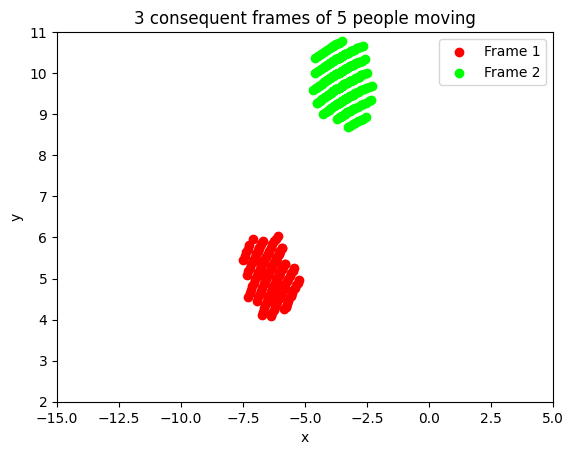

In [43]:
data = [frame.to_numpy() for frame in identity]
frame_num = 0
frame1 = data[frame_num]
frame2 = data[frame_num+1]

plt.scatter(frame1[:, 5], frame1[:, 4], c="red", label="Frame 1")
plt.scatter(frame2[:, 5], frame2[:, 4], c="lime", label="Frame 2")

plt.legend()
plt.title("3 consequent frames of 5 people moving")
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(-15, 5)
plt.ylim(2, 11)
plt.show()